<font size=5> Importing Libraries </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
import seaborn as sns
import math
from scipy.stats import pearsonr
%matplotlib inline

<font size="3">Exploratory Data Analysis </font>

In [2]:
dataset=pd.read_excel('WDIW Dataset.xlsx')
ratchet = dataset['Cool Name'] == "Ratchet"
dataset[ratchet].to_excel('Carribean_Latin_America.xlsx', index = False)
#Loading the data into data frame: countries
countries = pd.read_excel('Carribean_Latin_America.xlsx')
# To display the top 5 rows
countries.head(5)

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,ATG,Antigua & Barbuda,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,42.782,44.523535,12.393227,...,NaN,NaN,NaN,NaN,75.287,68.189701,440,NaN,24.713,0.412161
1,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,22.674,45.040333,18.961815,...,NaN,NaN,NaN,NaN,56.707,NaN,180,NaN,43.293,0.703980
2,BHS,"Bahamas, The",Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,30.001,42.723623,10.076940,...,NaN,1.8,NaN,NaN,17.075,74.921272,13880,15.100976,82.925,1.120365
3,BRB,Barbados,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,33.550,49.367531,23.018838,...,NaN,1.5,3.9,NaN,68.841,NaN,430,NaN,31.159,0.043738
4,VGB,British Virgin Is.,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.663,NaN,150,NaN,47.337,1.562026


In [3]:
# Checking the data type
countries.dtypes

Country Code                                 object
Country Name                                 object
Hult Region                                  object
Cool Name                                    object
Access to electricity (% of population)     float64
                                             ...   
Services, value added (% of GDP)            float64
Surface area (sq. km)                         int64
Tax revenue (% of GDP)                      float64
Urban population (% of total population)    float64
Urban population growth (annual %)          float64
Length: 67, dtype: object

In [4]:
# Renaming the column names
countries.columns = countries.columns.str.replace('%', 'percent')
countries.columns = countries.columns.str.replace(' ', '_')
countries.head(5)

,Country_Code,Country_Name,Hult_Region,Cool_Name,Access_to_electricity_(percent_of_population),"Access_to_electricity,_rural_(percent_of_rural_population)","Access_to_electricity,_urban_(percent_of_urban_population)","Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",Age_dependency_ratio_(percent_of_working-age_population),"Age_dependency_ratio,_old_(percent_of_working-age_population)",...,Poverty_headcount_ratio_at_national_poverty_lines_(percent_of_population),"Prevalence_of_HIV,_total_(percent_of_population_ages_15-49)",Prevalence_of_undernourishment_(percent_of_population),"Prevalence_of_underweight,_weight_for_age_(percent_of_children_under_5)",Rural_population_(percent_of_total_population),"Services,_value_added_(percent_of_GDP)",Surface_area_(sq._km),Tax_revenue_(percent_of_GDP),Urban_population_(percent_of_total_population),Urban_population_growth_(annual_percent)
0,ATG,Antigua & Barbuda,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,42.782,44.523535,12.393227,...,NaN,NaN,NaN,NaN,75.287,68.189701,440,NaN,24.713,0.412161
1,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,22.674,45.040333,18.961815,...,NaN,NaN,NaN,NaN,56.707,NaN,180,NaN,43.293,0.703980
2,BHS,"Bahamas, The",Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,30.001,42.723623,10.076940,...,NaN,1.8,NaN,NaN,17.075,74.921272,13880,15.100976,82.925,1.120365
3,BRB,Barbados,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,33.550,49.367531,23.018838,...,NaN,1.5,3.9,NaN,68.841,NaN,430,NaN,31.159,0.043738
4,VGB,British Virgin Is.,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.663,NaN,150,NaN,47.337,1.562026


In [5]:
countries.shape

(19, 67)

In [6]:
# Finding the null values.
print(countries.isnull().sum())

Country_Code                                       0
Country_Name                                       0
Hult_Region                                        0
Cool_Name                                          0
Access_to_electricity_(percent_of_population)      0
                                                  ..
Services,_value_added_(percent_of_GDP)             5
Surface_area_(sq._km)                              0
Tax_revenue_(percent_of_GDP)                      13
Urban_population_(percent_of_total_population)     0
Urban_population_growth_(annual_percent)           0
Length: 67, dtype: int64


In [7]:
 #Dropping the columns
countries=countries.drop(['Educational_attainment,_Doctoral_or_equivalent,_population_25+,_total_(percent)_(cumulative)', "Educational_attainment,_at_least_Bachelor's_or_equivalent,_population_25+,_total_(percent)_(cumulative)",
                "Educational_attainment,_at_least_Master's_or_equivalent,_population_25+,_total_(percent)_(cumulative)","Educational_attainment,_at_least_completed_lower_secondary,_population_25+,_total_(percent)_(cumulative)",
                "Educational_attainment,_at_least_completed_post-secondary,_population_25+,_total_(percent)_(cumulative)","Educational_attainment,_at_least_completed_primary,_population_25+_years,_total_(percent)_(cumulative)",
                "Educational_attainment,_at_least_completed_short-cycle_tertiary,_population_25+,_total_(percent)_(cumulative)","Educational_attainment,_at_least_completed_upper_secondary,_population_25+,_total_(percent)_(cumulative)",
                "GINI_index_(World_Bank_estimate)","Government_expenditure_on_education,_total_(percent_of_government_expenditure)",
                "Income_share_held_by_fourth_20percent","Income_share_held_by_highest_20percent","Income_share_held_by_lowest_20percent",
                "Income_share_held_by_second_20percent","Income_share_held_by_third_20percent",
                "Literacy_rate,_adult_total_(percent_of_people_ages_15_and_above)","Literacy_rate,_youth_total_(percent_of_people_ages_15-24)",
                "Military_expenditure_(percent_of_GDP)","Population_in_the_largest_city_(percent_of_urban_population)",
                "Poverty_headcount_ratio_at_$1.90_a_day_(2011_PPP)_(percent_of_population)","Poverty_headcount_ratio_at_$3.20_a_day_(2011_PPP)_(percent_of_population)",
                "Poverty_headcount_ratio_at_national_poverty_lines_(percent_of_population)","Prevalence_of_HIV,_total_(percent_of_population_ages_15-49)",
                "Prevalence_of_undernourishment_(percent_of_population)","Prevalence_of_underweight,_weight_for_age_(percent_of_children_under_5)",
                "Tax_revenue_(percent_of_GDP)","Employment_in_agriculture_(percent_of_total_employment)_(modeled_ILO_estimate)",
                "Employment_in_industry_(percent_of_total_employment)_(modeled_ILO_estimate)",
                "Employment_in_services_(percent_of_total_employment)_(modeled_ILO_estimate)","Industry_(including_construction),_value_added_(percent_of_GDP)",
                "Merchandise_trade_(percent_of_GDP)"
                         ], axis=1)

In [8]:
countries.shape

(19, 36)

<font size=4> Dealing with missing values </font>

<font size="2"> Column : Adolescent fertility rate (births per 1,000 women ages 15-19) </font>

In [9]:
#Using median to compute data for Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)
adolfertrate_array = countries[countries['Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)']!=np.nan]['Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)']
countries["Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)"]=countries["Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)"].replace(np.nan,adolfertrate_array.median())

In [10]:
#Using median to compute data for Age_dependency_ratio_(percent_of_working-age_population)
adgeworking_array = countries[countries['Age_dependency_ratio_(percent_of_working-age_population)']!=np.nan]['Age_dependency_ratio_(percent_of_working-age_population)']
countries["Age_dependency_ratio_(percent_of_working-age_population)"]=countries["Age_dependency_ratio_(percent_of_working-age_population)"].replace(np.nan,adgeworking_array.median())

#Using median to compute data for Age_dependency_ratio,_old_(percent_of_working-age_population
adgeworkingold_array = countries[countries['Age_dependency_ratio,_old_(percent_of_working-age_population)']!=np.nan]['Age_dependency_ratio,_old_(percent_of_working-age_population)']
countries["Age_dependency_ratio,_old_(percent_of_working-age_population)"]=countries["Age_dependency_ratio,_old_(percent_of_working-age_population)"].replace(np.nan,adgeworkingold_array.median())

#Using median to compute data for Age_dependency_ratio,_young_(percent_of_working-age_population)
adgeworkingyoung_array = countries[countries['Age_dependency_ratio,_young_(percent_of_working-age_population)']!=np.nan]['Age_dependency_ratio,_young_(percent_of_working-age_population)']
countries["Age_dependency_ratio,_young_(percent_of_working-age_population)"]=countries["Age_dependency_ratio,_young_(percent_of_working-age_population)"].replace(np.nan,adgeworkingyoung_array.median())


<font size="2">Column :Agriculture, forestry, and fishing, value added (% of GDP)</font>

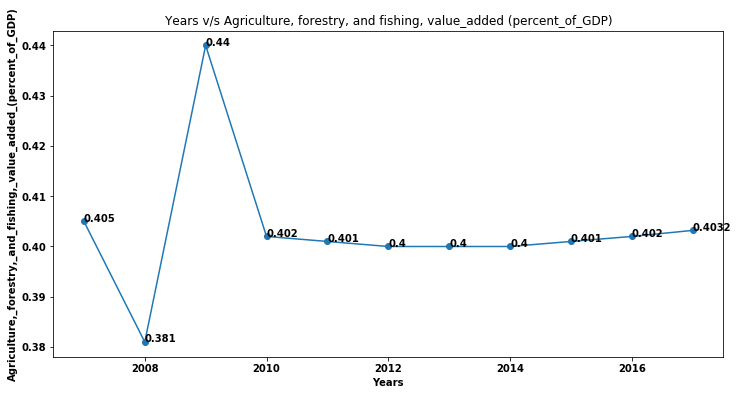

In [11]:
yr=np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
agri_fish=np.array([0.405,0.381,0.440,0.402,0.401,0.400,0.400,0.400,0.401,0.402])
countries.loc[1,'Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)']=agri_fish.mean()  #for Aruba
yr=np.append(yr,[[2017]])
agri_fish=np.append(agri_fish,[[agri_fish.mean()]])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(yr,agri_fish,marker='o')
plt.ylabel("Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)")
plt.xlabel("Years")
plt.title('Years v/s Agriculture, forestry, and fishing, value_added (percent_of_GDP)')
for i,j in zip(yr,agri_fish):
    ax.annotate(str(j),xy=(i,j))

plt.show()

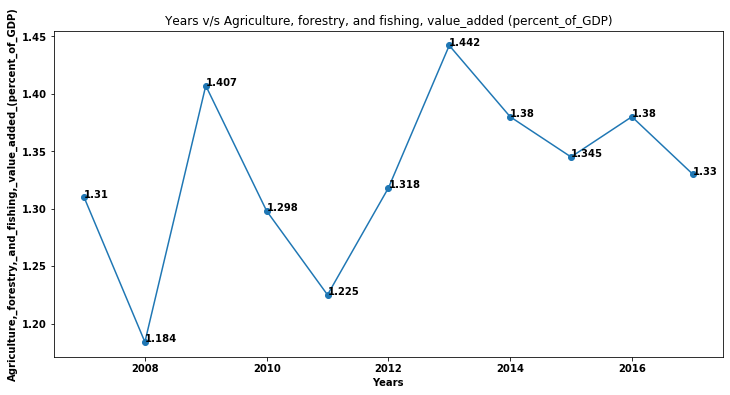

In [12]:
yr1=np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
agri_fish1=np.array([1.310,1.184,1.407,1.298,1.225,1.318,1.442,1.380,1.345,1.380])

countries.loc[3,'Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)']=agri_fish1.mean()  #for Barbados
yr1=np.append(yr1,[[2017]])
agri_fish1=np.append(agri_fish1,[[round(agri_fish1.mean(),2)]])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(yr1,agri_fish1,marker='o')
plt.ylabel("Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)")
plt.xlabel("Years")
plt.title('Years v/s Agriculture, forestry, and fishing, value_added (percent_of_GDP)')
for i,j in zip(yr1,agri_fish1):
    ax.annotate(str(j),xy=(i,j))

plt.show()

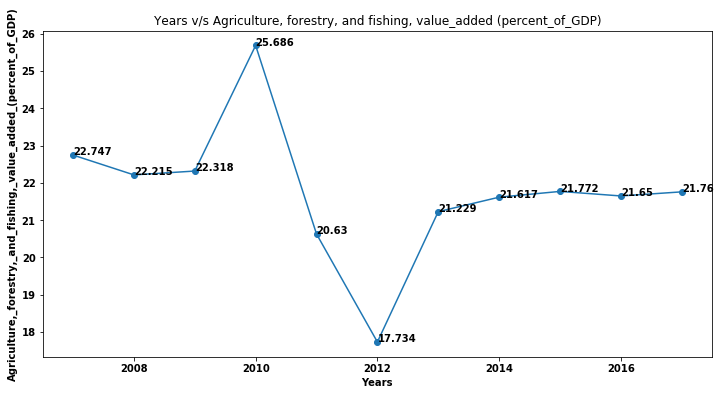

In [13]:
yr2=np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
agri_fish2=np.array([22.747,22.215,22.318,25.686,20.63,17.734,21.229,21.617,21.772,21.650])
countries.loc[10,'Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)']=agri_fish2.mean()  #for Haiti
yr2=np.append(yr2,[[2017]])
agri_fish2=np.append(agri_fish2,[[round(agri_fish2.mean(),2)]])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.plot(yr2,agri_fish2,marker='o')
plt.ylabel("Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)")
plt.xlabel("Years")
plt.title('Years v/s Agriculture, forestry, and fishing, value_added (percent_of_GDP)')
for i,j in zip(yr2,agri_fish2):
    ax.annotate(str(j),xy=(i,j))

plt.show()


In [14]:
#Using median to compute data for Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)
agrifish_array = countries[countries['Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)']!=np.nan]['Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)']
countries["Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)"]=countries["Agriculture,_forestry,_and_fishing,_value_added_(percent_of_GDP)"].replace(np.nan,agrifish_array.median())


<font size="2"> Column: Armed forces personnel (% of total labor force) </font>

In [15]:
countries.loc[0,'Armed_forces_personnel_(percent_of_total_labor_force)']=0  #for Antigua & Barbuda

In [16]:
countries['Armed_forces_personnel_(percent_of_total_labor_force)']=countries["Armed_forces_personnel_(percent_of_total_labor_force)"].replace(np.nan,0)

<font size="2">Column : Birth rate, crude (per 1,000 people) </font>

In [17]:
countries.loc[4,'Birth_rate,_crude_(per_1,000_people)']=11.10  #for British Virgin Is.
countries.loc[7,'Birth_rate,_crude_(per_1,000_people)']=15.10  #for Dominica
countries.loc[13,'Birth_rate,_crude_(per_1,000_people)']=13.20  #for Saint Kitts & Nevis
countries.loc[17,'Birth_rate,_crude_(per_1,000_people)']=15.30  #for Turks & Caicos Is

<font size ="2">Death rate, crude (per 1,000 people)</font>

In [18]:
countries.loc[4,'Death_rate,_crude_(per_1,000_people)']=5.10  #for British Virgin Is.
countries.loc[7,'Death_rate,_crude_(per_1,000_people)']=7.90  #for Dominica
countries.loc[13,'Death_rate,_crude_(per_1,000_people)']=7.10  #for Saint Kitts & Nevis
countries.loc[17,'Death_rate,_crude_(per_1,000_people)']=3.20  #for Turks & Caicos Is

<font size="2"> GDP growth (annual percent)</font>

In [19]:
countries.loc[4,'GDP_(current_US$)']=500000000  #for British Virgin Is.
countries.loc[4,'GDP_growth_(annual_percent)']=2  #for British Virgin Is.

<font size="2"> Fertility rate, total (births per woman)</font>

In [20]:
countries.loc[4,'Fertility_rate,_total_(births_per_woman)']=1.29  #for British Virgin Is.
countries.loc[5,'Fertility_rate,_total_(births_per_woman)']=1.85  #for Cayman
countries.loc[7,'Fertility_rate,_total_(births_per_woman)']=2.03  #for Dominica
countries.loc[13,'Fertility_rate,_total_(births_per_woman)']=1.77  #for Saint Kitts & Nevis
countries.loc[17,'Fertility_rate,_total_(births_per_woman)']=1.70  #for Turks & Caicos Is

<font size="2"> Column : Rural population (percent of total population)</font>

In [21]:
countries.loc[5,'Rural_population_(percent_of_total_population)']=0  #for Cayman

<font size="2"> Life Expectancy</font> 

In [22]:
#Life expectancy at birth, total (years)
countries.loc[4,'Life_expectancy_at_birth,_total_(years)'] =78.8   #British Virgin Is.
countries.loc[5,'Life_expectancy_at_birth,_total_(years)'] =81.3   #Cayman Islands
countries.loc[7,'Life_expectancy_at_birth,_total_(years)'] =77.2   #Dominica
countries.loc[13,'Life_expectancy_at_birth,_total_(years)']=75.9   #St. Kitts & Nevis
countries.loc[17,'Life_expectancy_at_birth,_total_(years)']=80.0   #Turks & Caicos Is.

<font size="2"> Services value added </font>

In [23]:
#Services, value added (% of GDP)
countries.loc[1,'Services,_value_added_(percent_of_GDP)']  =67.60   #Aruba
countries.loc[3,'Services,_value_added_(percent_of_GDP)']  =73.91   #Barbados
countries.loc[10,'Services,_value_added_(percent_of_GDP)'] =22.98   #Haiti

<font size="2">Birth attended by skilled staff </font>

In [24]:
#for years 2012,2013,2014,2015,2016
birthstaff1=np.array([99.90,99.90,99.90,99.90,99.90])
countries.loc[6,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff1.mean()  #for Cuba

#for years 2012,2013,2014,2015,2016
birthstaff2=np.array([100,100,100,96,96])
countries.loc[7,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff2.mean()  #for Dominica

#for years 2012,2013,2014,2015,2016
birthstaff3=np.array([98.80,98.60,97.60,99.60,98.29])
countries.loc[8,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff3.mean()  #for Dominican Republic

#for years 2012,2013,2014,2015,2016
birthstaff4=np.array([98.90,98.60,99.70,99.00,99.46])
countries.loc[3,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff4.mean()  #for Barbados

#for years 2013,2014,2015,2016
birthstaff5=np.array([98.00,99.60,98.93,98.92])
countries.loc[2,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff5.mean()  #for Bahamas

#for years 2012,2013,2014,2015,2016
birthstaff6=np.array([100,100,100,100,100])
countries.loc[0,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff6.mean()  #for Antigua & Barbuda

#for years 2012,2013,2014,2015,2016
birthstaff7=np.array([99,99,99,99.25,99.30])
countries.loc[9,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff7.mean()  #for Grenada

#for years 2012,2013,2014,2015,2016
birthstaff8=np.array([100,100,100,100,100])
countries.loc[13,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff8.mean()  #for St Kitts & Nevis

#for years 2012,2013,2014,2015,2016
birthstaff9=np.array([98.7,99.5,99.4,99.3,98.6])
countries.loc[14,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff9.mean()  #for Saint Lucia
 
#for years 2012,2013,2014,2015,2016
birthstaff10=np.array([99.2,99,99,99,99.05])
countries.loc[15,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff10.mean()  #for ST. Vicente & Grenadines

#for years 2012,2013,2014,2015,2016
birthstaff11=np.array([100,100,100,100,100])
countries.loc[16,'Births_attended_by_skilled_health_staff_(percent_of_total)']=birthstaff11.mean()  #for Trinidad & Tobago

In [25]:
birthskilled_mean = countries.loc[:,'Births_attended_by_skilled_health_staff_(percent_of_total)'].mean()
countries.loc[:,'Births_attended_by_skilled_health_staff_(percent_of_total)']= countries.loc[:,'Births_attended_by_skilled_health_staff_(percent_of_total)'].fillna(birthskilled_mean).round(2)


<font size="2"> Mobile cellular subscription (per 100 people) </font>

In [26]:
Aruba_m = np.array([131.63, 134.55, 134.619, 135.134])
Aruba_m_p = np.median(Aruba_m)
# Adding missing values on column 'Mobile_cellular_subscriptions_(per_100_people)'
countries.loc[1,'Mobile_cellular_subscriptions_(per_100_people)']  = Aruba_m_p

mobile_median = countries.loc[:,'Mobile_cellular_subscriptions_(per_100_people)'].median()
countries.loc[:,'Mobile_cellular_subscriptions_(per_100_people)']= countries.loc[:,'Mobile_cellular_subscriptions_(per_100_people)'].fillna(mobile_median).round(2)


<font size="2"> Population </font>

In [27]:
# Adding missing values in Population, female and male
# British Virgin Island
briv_pop_f = int(countries['Population,_total'].iloc[4] * 0.5077)
briv_pop_m = countries['Population,_total'].iloc[4] - briv_pop_f

#Cayman Islands
ci_pop_f = int(countries['Population,_total'].iloc[5] * 0.5109)
ci_pop_m = countries['Population,_total'].iloc[5] - ci_pop_f

#Dominica
dom_pop_f = int(countries['Population,_total'].iloc[7] * 0.4964)
dom_pop_m = countries['Population,_total'].iloc[7] - dom_pop_f

#Saint Kitts & Nevis
stkn_pop_f = int(countries['Population,_total'].iloc[13] * 0.5060)
stkn_pop_m = countries['Population,_total'].iloc[13] - stkn_pop_f

#Turks and Caicos Islands
tci_pop_f = int(countries['Population,_total'].iloc[17] * 0.4966)
tci_pop_m = countries['Population,_total'].iloc[17] - tci_pop_f

# Adding missing values on column 'Population,_female'
countries['Population,_female'].iloc[4]  = briv_pop_f
countries['Population,_female'].iloc[5]  = ci_pop_f
countries['Population,_female'].iloc[7]  = dom_pop_f
countries['Population,_female'].iloc[13] = stkn_pop_f
countries['Population,_female'].iloc[17] = tci_pop_f

# Adding missing values on column 'Population,_male'
countries['Population,_male'].iloc[4]  = briv_pop_m
countries['Population,_male'].iloc[5]  = ci_pop_m
countries['Population,_male'].iloc[7]  = dom_pop_m
countries['Population,_male'].iloc[13] = stkn_pop_m
countries['Population,_male'].iloc[17] = tci_pop_m

# Adding missing values on column 'Population_ages_0-14_(percent_of_total_population)'
countries['Population_ages_0-14_(percent_of_total_population)'].iloc[4]  = 16.70
countries['Population_ages_0-14_(percent_of_total_population)'].iloc[5]  = 18.00
countries['Population_ages_0-14_(percent_of_total_population)'].iloc[7]  = 21.72
countries['Population_ages_0-14_(percent_of_total_population)'].iloc[13] = 20.32
countries['Population_ages_0-14_(percent_of_total_population)'].iloc[17] = 21.74

# Adding missing values on column 'Population_ages_15-64_(percent_of_total_population)'
countries['Population_ages_15-64_(percent_of_total_population)'].iloc[4]  = 74.33
countries['Population_ages_15-64_(percent_of_total_population)'].iloc[5]  = 69.41
countries['Population_ages_15-64_(percent_of_total_population)'].iloc[7]  = 67.14
countries['Population_ages_15-64_(percent_of_total_population)'].iloc[13] = 71.04
countries['Population_ages_15-64_(percent_of_total_population)'].iloc[17] = 73.69

# Adding missing values on column
countries['Population_ages_65_and_above_(percent_of_total_population)'].iloc[4]  = 8.97
countries['Population_ages_65_and_above_(percent_of_total_population)'].iloc[5]  = 12.59
countries['Population_ages_65_and_above_(percent_of_total_population)'].iloc[7]  = 11.14
countries['Population_ages_65_and_above_(percent_of_total_population)'].iloc[13] = 8.64
countries['Population_ages_65_and_above_(percent_of_total_population)'].iloc[17] = 4.57


C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
services_median   = countries.loc[:,'Services,_value_added_(percent_of_GDP)'].median()
countries.loc[:,'Services,_value_added_(percent_of_GDP)']= countries.loc[:,'Services,_value_added_(percent_of_GDP)'].fillna(services_median).round(2)

In [29]:
countries.isnull().sum().any()

False

In [30]:
countries.to_excel('regionds.xlsx',index=False) #regionds file contains no missing values

In [31]:
countries.shape

(19, 36)

In [32]:
#Loading the data into data frame :countries
region = pd.read_excel('regionds.xlsx')
# To display the top 5 rows
region.head(5)

,Country_Code,Country_Name,Hult_Region,Cool_Name,Access_to_electricity_(percent_of_population),"Access_to_electricity,_rural_(percent_of_rural_population)","Access_to_electricity,_urban_(percent_of_urban_population)","Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",Age_dependency_ratio_(percent_of_working-age_population),"Age_dependency_ratio,_old_(percent_of_working-age_population)",...,Population_growth_(annual_percent),Population_living_in_slums_(percent_of_urban_population),"Population,_female","Population,_male","Population,_total",Rural_population_(percent_of_total_population),"Services,_value_added_(percent_of_GDP)",Surface_area_(sq._km),Urban_population_(percent_of_total_population),Urban_population_growth_(annual_percent)
0,ATG,Antigua & Barbuda,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,42.782,44.523535,12.393227,...,0.946557,0.590710,49440,45986,95426,75.287,68.19,440,24.713,0.412161
1,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,22.674,45.040333,18.961815,...,0.469944,0.691301,55331,50035,105366,56.707,67.60,180,43.293,0.703980
2,BHS,"Bahamas, The",Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,30.001,42.723623,10.076940,...,1.008312,0.578124,196371,185390,381761,17.075,74.92,13880,82.925,1.120365
3,BRB,Barbados,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,33.550,49.367531,23.018838,...,0.152789,0.295527,148008,138225,286233,68.841,73.91,430,31.159,0.043738
4,VGB,British Virgin Is.,Carribean Islands & Parts of Latin America,Ratchet,100.0,100.0,100.0,37.043,48.261108,14.154187,...,0.753414,0.738988,15016,14561,29577,52.663,66.94,150,47.337,1.562026


In [33]:
region.shape

(19, 36)

In [34]:
region.dtypes

Country_Code                                                                                                   object
Country_Name                                                                                                   object
Hult_Region                                                                                                    object
Cool_Name                                                                                                      object
Access_to_electricity_(percent_of_population)                                                                 float64
Access_to_electricity,_rural_(percent_of_rural_population)                                                    float64
Access_to_electricity,_urban_(percent_of_urban_population)                                                    float64
Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)                                                 float64
Age_dependency_ratio_(percent_of_working-age_population)

<font size="4">Finding Outliers</font>

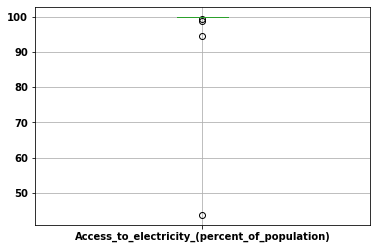

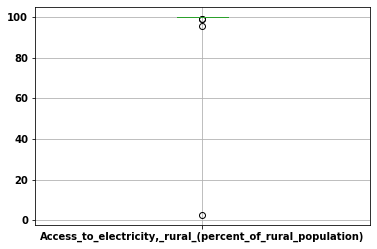

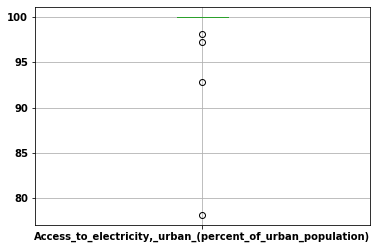

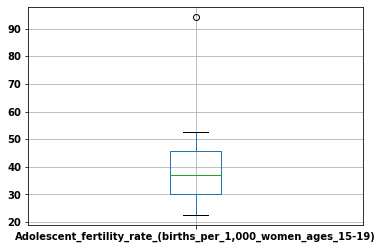

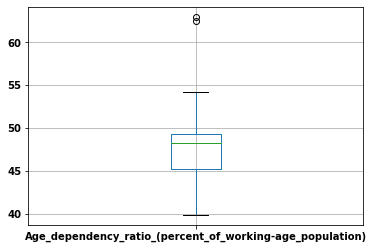

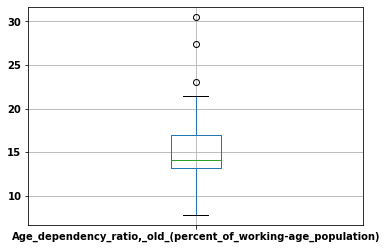

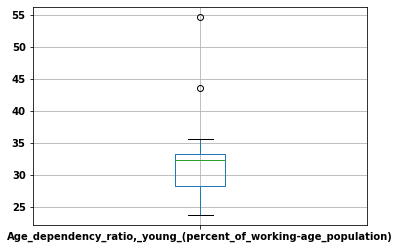

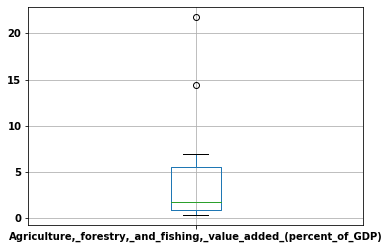

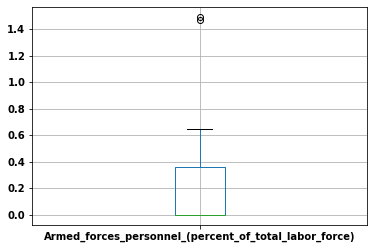

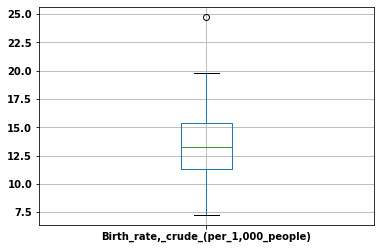

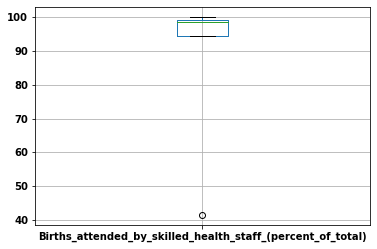

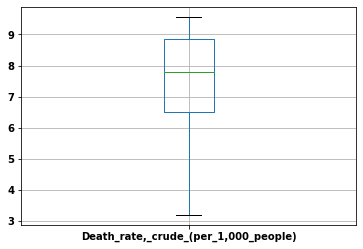

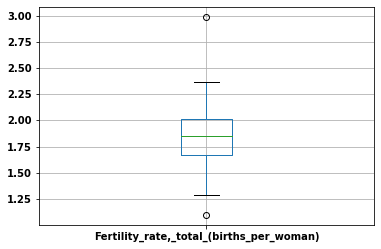

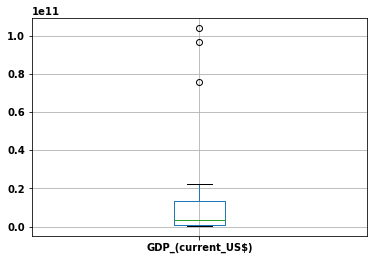

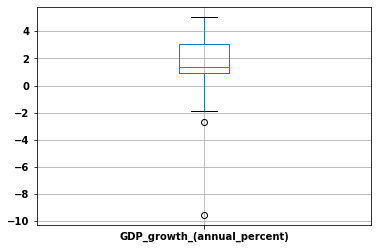

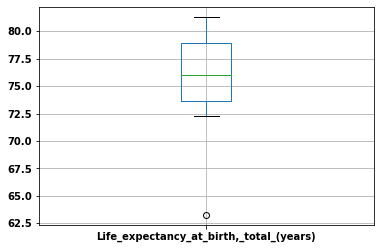

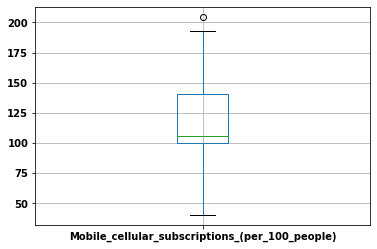

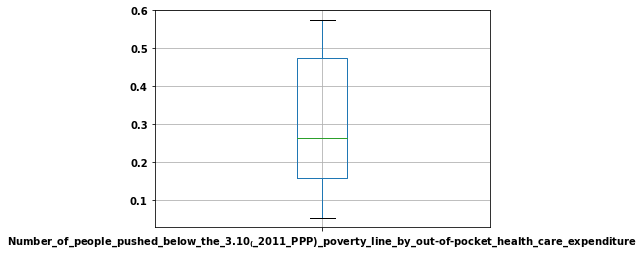

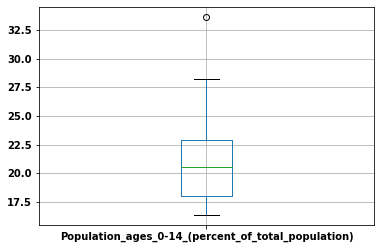

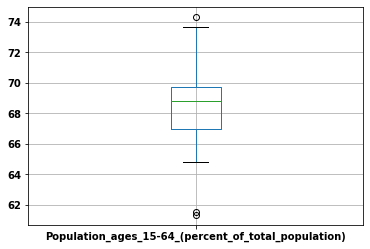

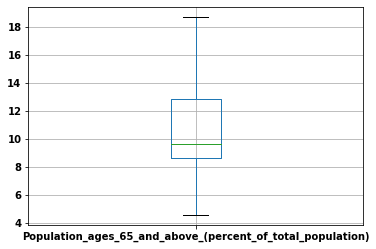

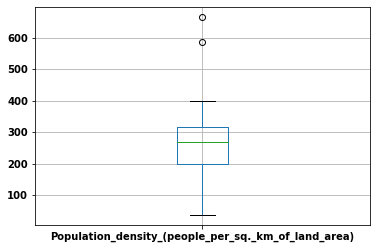

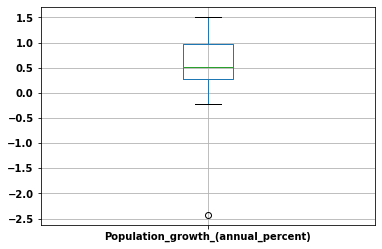

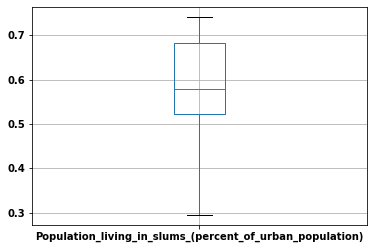

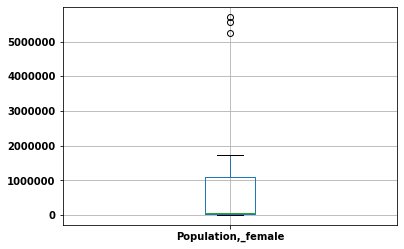

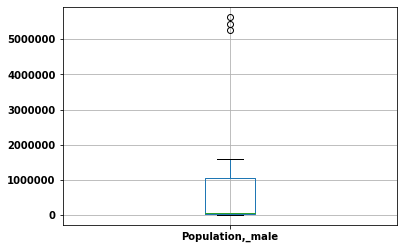

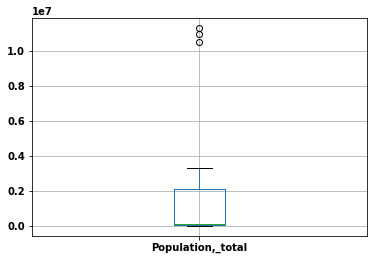

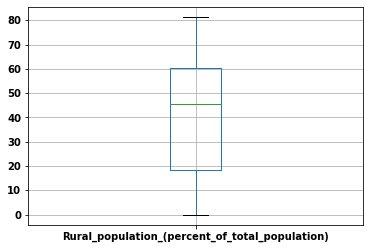

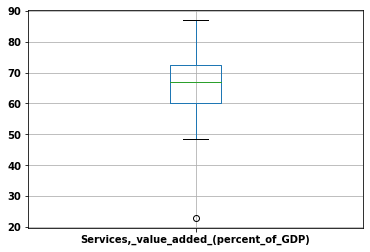

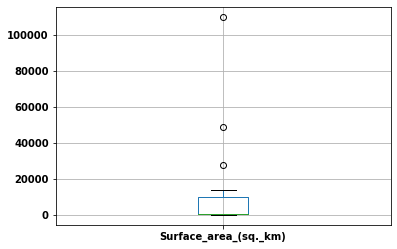

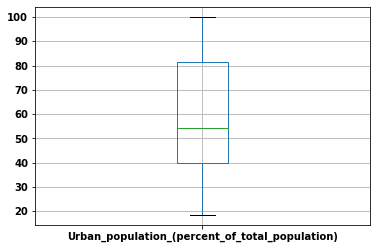

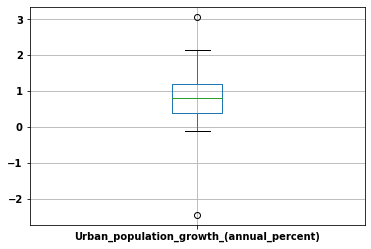

In [35]:
h=4
while h<36:
    region.boxplot(column =region.columns[h])
    plt.show()
    h+=1

<font size="3">Puerto Rico an outlier </font>

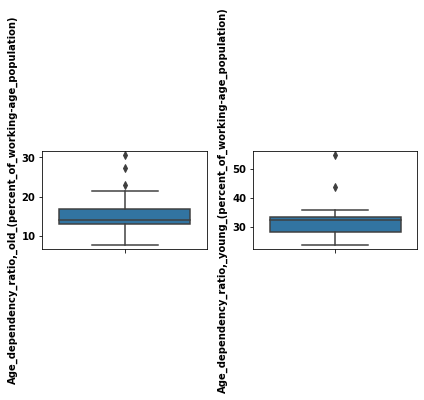

In [36]:
f, axes = plt.subplots(1, 2)
sns.boxplot( y=region["Age_dependency_ratio,_old_(percent_of_working-age_population)"],ax=axes[0],orient='v' )
sns.boxplot( y=region["Age_dependency_ratio,_young_(percent_of_working-age_population)"],ax=axes[1],orient='v' )
plt.tight_layout()

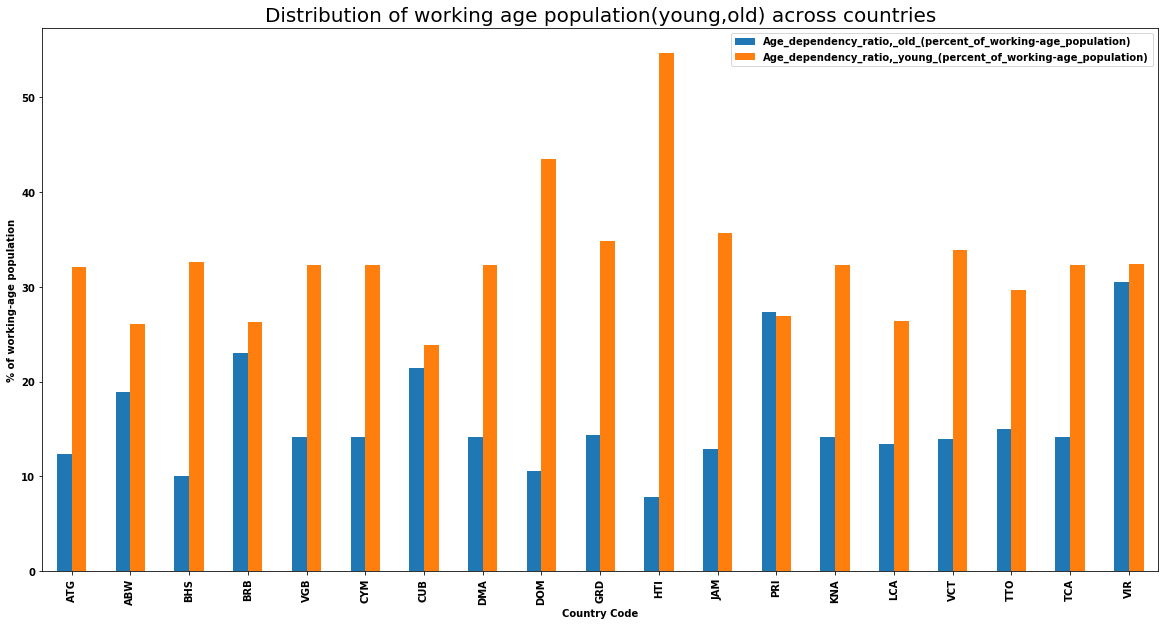

In [37]:
region.plot(x="Country_Code", y=["Age_dependency_ratio,_old_(percent_of_working-age_population)", "Age_dependency_ratio,_young_(percent_of_working-age_population)"], kind="bar",figsize=(20,10))
plt.xlabel('Country Code')
plt.ylabel('% of working-age population')
plt.title('Distribution of working age population(young,old) across countries',fontsize=20)
plt.savefig('AgeDepend',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

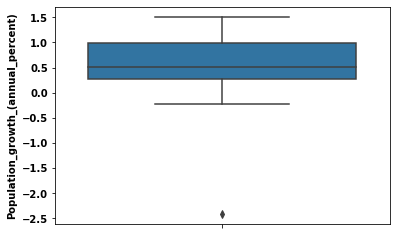

In [38]:
# Puerto rico for population growth
sns.boxplot( y=region["Population_growth_(annual_percent)"])

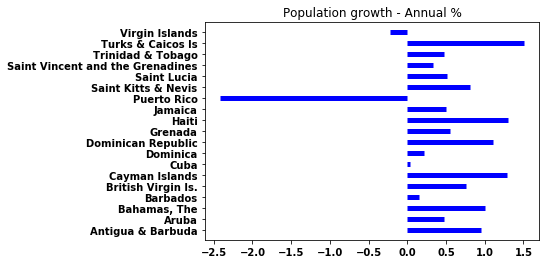

In [39]:
plt.hlines(y=region.loc[:,'Country_Name'],xmin=0, xmax=region.loc[:,'Population_growth_(annual_percent)'], color='blue', linewidth=5)
plt.title('Population growth - Annual %')
plt.savefig('Population_growth',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

<font size="3">Haiti an outlier</font>

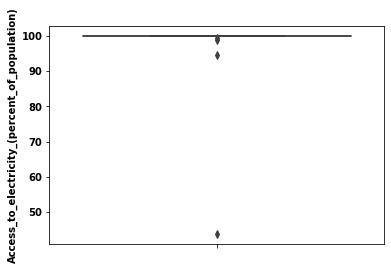

In [40]:
# Haiti for Access to electricity
sns.boxplot( y=region["Access_to_electricity_(percent_of_population)"])

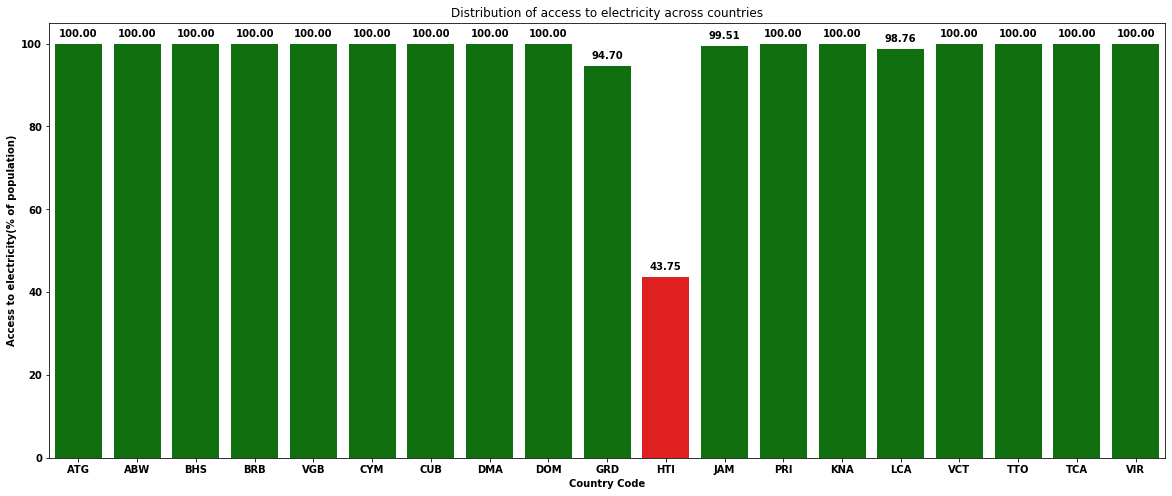

In [41]:
plt.figure(figsize=(20, 8))
clrs = ['red' if (x < max(region['Access_to_electricity_(percent_of_population)']) and x < 90) else 'green' for x in region['Access_to_electricity_(percent_of_population)'] ]
ax=sns.barplot(x='Country_Code', y='Access_to_electricity_(percent_of_population)', data=region,palette=clrs )
ax.set(xlabel='Country Code', ylabel='Access to electricity(% of population)',title="Distribution of access to electricity across countries")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('Access_to_electricity',
            dpi = 100,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()

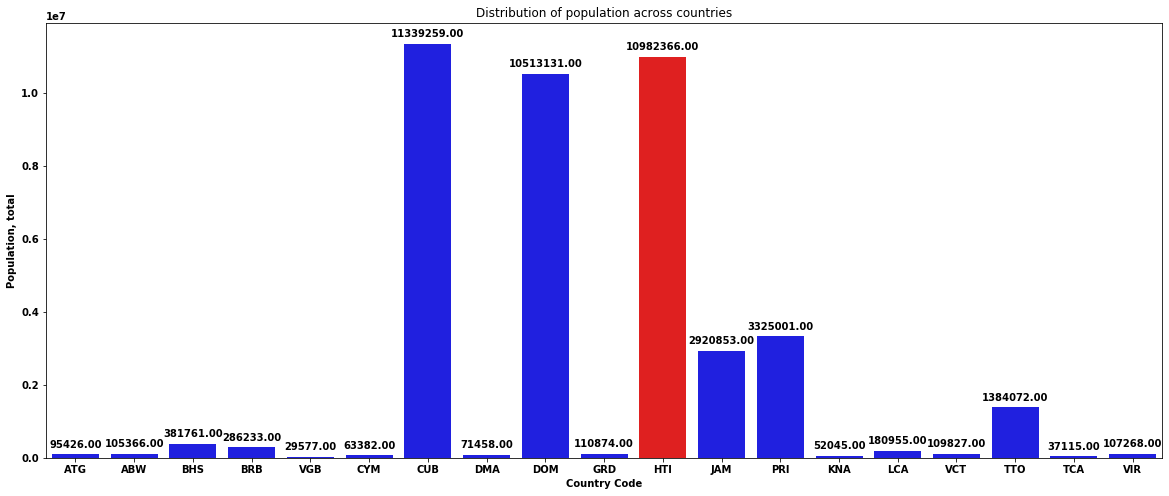

In [42]:
plt.figure(figsize=(20, 8))
clrs = ['red' if (x == 10982366.00) else 'blue' for x in region['Population,_total'] ]
ax=sns.barplot(x='Country_Code', y='Population,_total', data=region,palette=clrs )
ax.set(xlabel='Country Code', ylabel='Population, total',title="Distribution of population across countries")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('Population',
            dpi = 100,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()

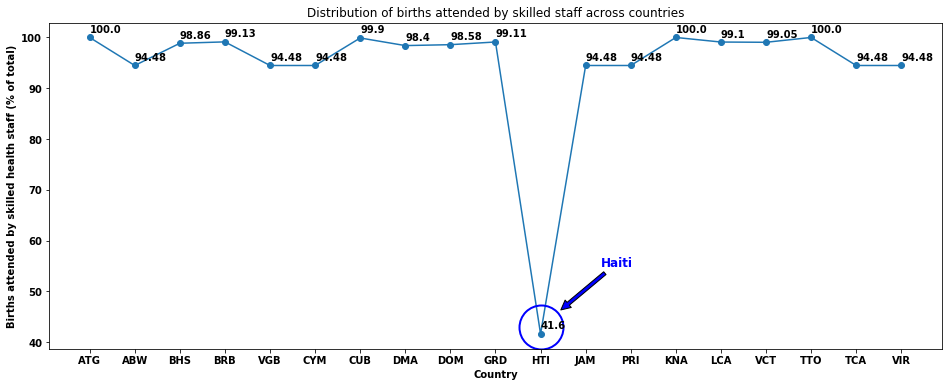

In [43]:
#Low high skill birth attends
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
plt.plot(region['Country_Code'],region['Births_attended_by_skilled_health_staff_(percent_of_total)'],marker='o')
plt.xlabel("Country")
plt.ylabel("Births attended by skilled health staff (% of total)")
plt.title("Distribution of births attended by skilled staff across countries")
for i,j in zip(region['Country_Code'],region['Births_attended_by_skilled_health_staff_(percent_of_total)']):
    ax.annotate(str(j),xy=(i,j+1))
circle_rad = 22 # This is the radius, in points
plt.plot(10, 43, 'o',
        ms=circle_rad * 2, mec='b', mfc='none', mew=2)
plt.annotate('Haiti', xy=(10,43), xytext=(60, 60),
            textcoords='offset points',
            color='b', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=circle_rad * 1.2)
)   

plt.savefig('Birth_skilled_staff',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

plt.show()

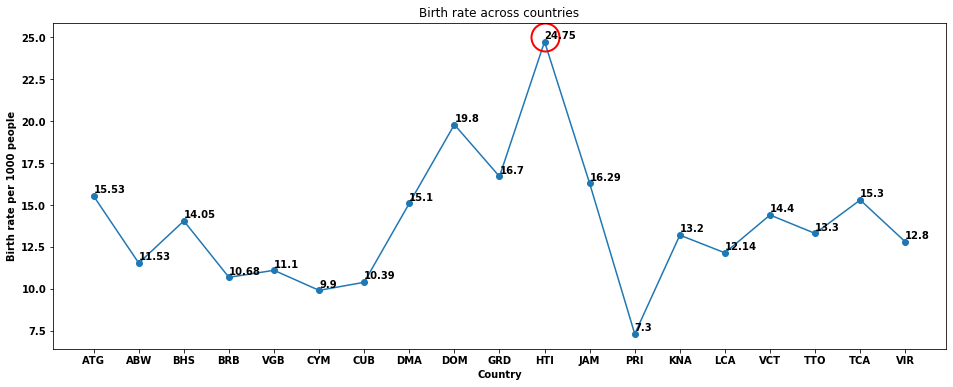

In [44]:
#High Birth rate
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
plt.plot(region['Country_Code'],region['Birth_rate,_crude_(per_1,000_people)'],marker='o')
plt.xlabel("Country")
plt.ylabel("Birth rate per 1000 people")
plt.title("Birth rate across countries")
for i,j in zip(region['Country_Code'],region['Birth_rate,_crude_(per_1,000_people)']):
    ax.annotate(str(round(j,2)),xy=(i,j+0.2))
circle_rad = 14 # This is the radius, in points
plt.plot(10, 25, 'o',
        ms=circle_rad * 2, mec='r', mfc='none', mew=2)
plt.savefig('Birth_high',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

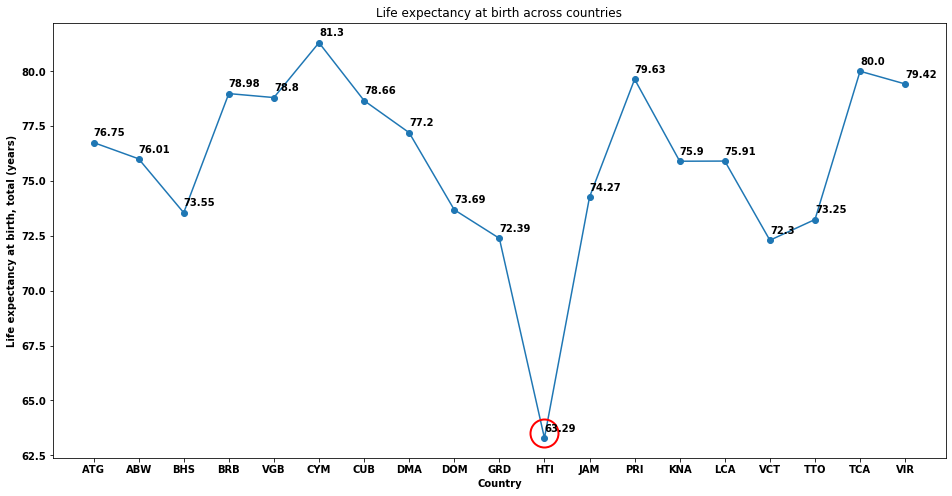

In [45]:
#Low expectancy at birth
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plt.plot(region['Country_Code'],region['Life_expectancy_at_birth,_total_(years)'],marker='o')
plt.xlabel("Country")
plt.ylabel("Life expectancy at birth, total (years)")
plt.title('Life expectancy at birth across countries')
for i,j in zip(region['Country_Code'],region['Life_expectancy_at_birth,_total_(years)']):
    ax.annotate(str(round(j,2)),xy=(i,j+0.3))
circle_rad = 14 # This is the radius, in points
plt.plot(10, 63.5, 'o',
        ms=circle_rad * 2, mec='r', mfc='none', mew=2)
plt.savefig('Expectancy',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

In [46]:
#GDP per capita
region['GDP_per_capita'] = region['GDP_(current_US$)'] / region['Population,_total']

region[['Country_Name','GDP_per_capita']].sort_values(by = 'GDP_per_capita',\
                        ascending = False)

,Country_Name,GDP_per_capita
5,Cayman Islands,56334.213992
18,Virgin Islands,35938.024388
2,"Bahamas, The",31857.890146
12,Puerto Rico,31353.434179
17,Turks & Caicos Is,25933.607436
1,Aruba,25630.266492
13,Saint Kitts & Nevis,19060.570720
4,British Virgin Is.,16905.027555
3,Barbados,16327.607229
16,Trinidad & Tobago,16076.082038


<font size="3"> Dominican Republic a Outlier </font>

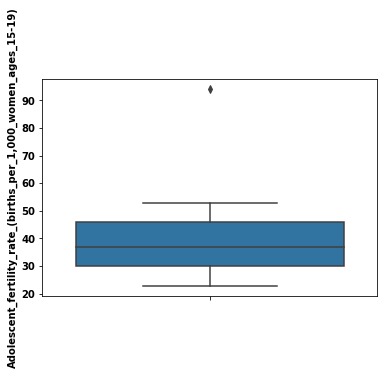

In [47]:
# Dominica Republic for Adolescent fertility rate
sns.boxplot( y=region["Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)"])

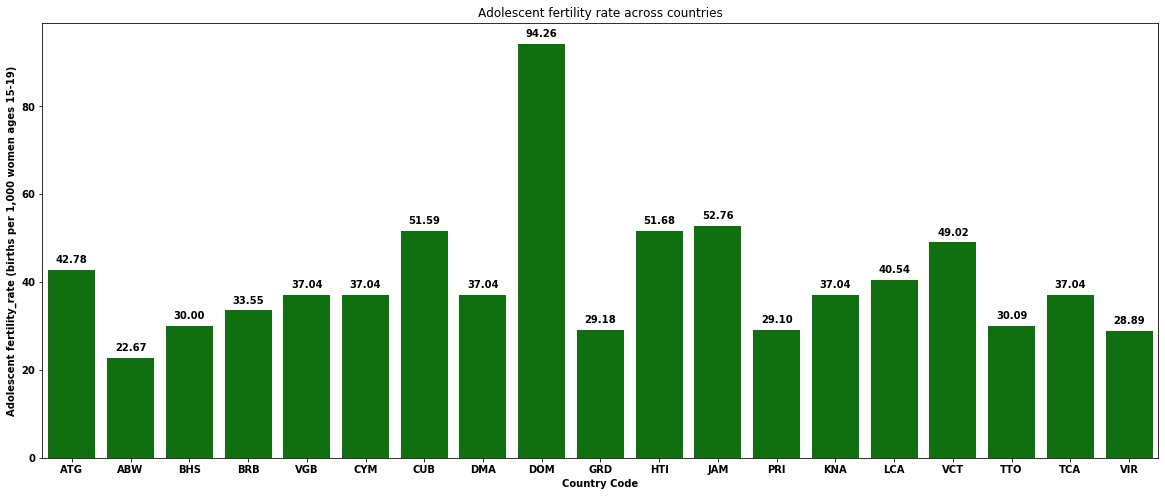

In [48]:
plt.figure(figsize=(20, 8))
clrs = ['green']
ax=sns.barplot(x='Country_Code', y='Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)', data=region,palette=clrs )
ax.set(xlabel='Country Code', ylabel='Adolescent fertility_rate (births per 1,000 women ages 15-19)',title="Adolescent fertility rate across countries")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.savefig('Adolescent fertility',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()

<font size="4">Findings</font>

In [49]:
# adding new column "Income Group"

idx = 4
new_col = ["High Income",         #1
           "High Income",         #2
           "High Income",         #3
           "High Income",         #4
           "High Income",         #5
           "High Income",         #6
           "Upper Middle Income", #7
           "Upper Middle Income", #8
           "Upper Middle Income", #9
           "Upper Middle Income", #10
           "Low Income",          #11
           "Upper Middle Income", #12
           "High Income",         #13
           "High Income",         #14
           "Upper Middle Income", #15
           "Upper Middle Income", #16
           "High Income",         #17
           "High Income",         #18
           "High Income",         #19
          ]

region.insert(loc = idx, column = "Income_Group", value = new_col)

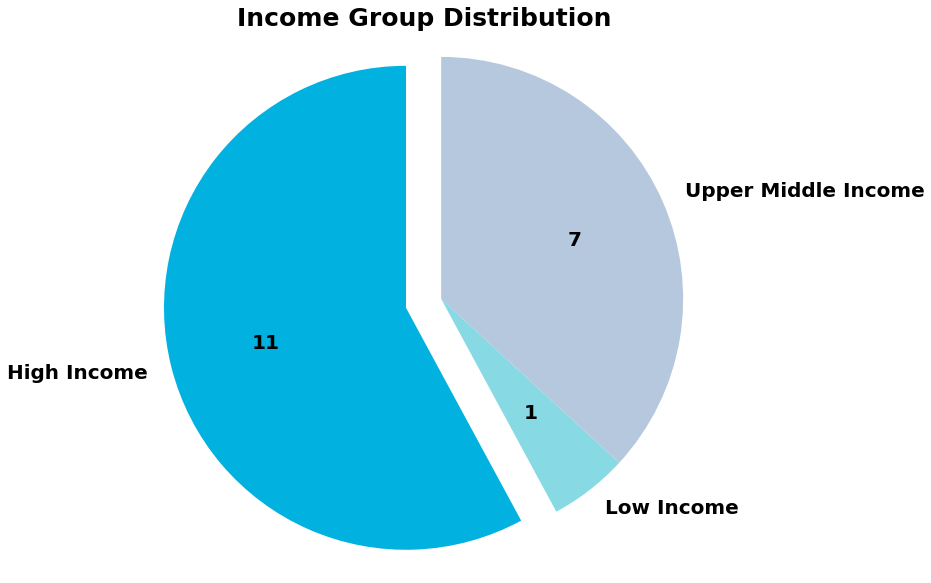

In [50]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize = (10,10))

# Create a list of colors 
colors = ["#01b1e0", "#87d9e3", "#b6c8dd"]

# Create array 
x = region['Income_Group']
keys, counts = np.unique(x, return_counts = True)


# Define the absolute_value
def absolute_value(val):
    a  = int(np.round(val/100.*counts.sum(), 0))
    return a

# Create a pie chart
plt.pie(counts,
        labels = keys,
        shadow = False,
        colors = colors,
        explode = (0.15,0,0),
        startangle = 90,
        autopct = absolute_value,
        textprops = {'fontsize': 20},
        )

plt.axis('equal')
plt.title('Income Group Distribution', 
           fontsize = 25,
           verticalalignment = 'baseline',
           fontweight = 'bold')
plt.savefig('Income Group Pie Chart.png',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95)
plt.show()

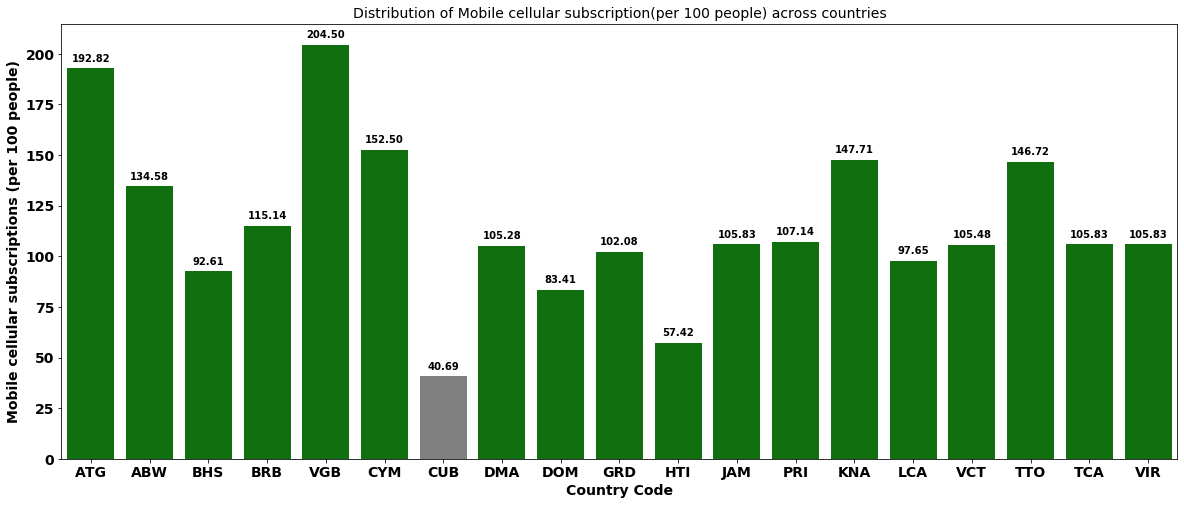

In [51]:
#Cuba
plt.figure(figsize=(20, 8))
clrs = ['grey' if (x < max(region['Mobile_cellular_subscriptions_(per_100_people)']) and x < 50) else 'green' for x in region['Mobile_cellular_subscriptions_(per_100_people)'] ]
ax=sns.barplot(x='Country_Code', y='Mobile_cellular_subscriptions_(per_100_people)', data=region,palette=clrs )
ax.set(xlabel='Country Code', ylabel='Mobile cellular subscriptions (per 100 people)',title="Distribution of Mobile cellular subscription(per 100 people) across countries")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

plt.savefig('Mobile',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()

In [52]:
all_regions=pd.read_excel('WDIW Dataset.xlsx')

In [53]:
# Renaming the column names
all_regions.columns = all_regions.columns.str.replace('%', 'percent')
all_regions.columns = all_regions.columns.str.replace(' ', '_')
all_regions.head(5)

,Country_Code,Country_Name,Hult_Region,Cool_Name,Access_to_electricity_(percent_of_population),"Access_to_electricity,_rural_(percent_of_rural_population)","Access_to_electricity,_urban_(percent_of_urban_population)","Adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)",Age_dependency_ratio_(percent_of_working-age_population),"Age_dependency_ratio,_old_(percent_of_working-age_population)",...,Poverty_headcount_ratio_at_national_poverty_lines_(percent_of_population),"Prevalence_of_HIV,_total_(percent_of_population_ages_15-49)",Prevalence_of_undernourishment_(percent_of_population),"Prevalence_of_underweight,_weight_for_age_(percent_of_children_under_5)",Rural_population_(percent_of_total_population),"Services,_value_added_(percent_of_GDP)",Surface_area_(sq._km),Tax_revenue_(percent_of_GDP),Urban_population_(percent_of_total_population),Urban_population_growth_(annual_percent)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.7,97.091973,99.5,68.957,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,100.000000,100.0,19.642,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617,47.965907,28750.0,18.879748,59.383,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.0,100.000000,100.0,10.071,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948,45.615016,2381740.0,NaN,72.052,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830,NaN,200.0,NaN,87.170,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.0,100.000000,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850,79.285586,470.0,NaN,88.150,-0.495265


In [54]:
df = all_regions[['Hult_Region','GDP_growth_(annual_percent)']]
pd.pivot_table(df, values='GDP_growth_(annual_percent)', 
                    columns='Hult_Region', aggfunc='mean')

Hult_Region,Arabian Peninsula,Australia & Oceania,Carribean Islands & Parts of Latin America,Central Asia,East/South Africa,East/Southeast Asia,Eastern Europe,Middle East & Russia,North America & Part of Latin America,Northern Sub-Saharan Africa,South America,Sub-Saharan Africa,Western Europe,World
GDP_growth_(annual_percent),1.040835,3.376563,0.976639,5.890563,3.097511,4.056088,3.396575,4.089662,3.195277,5.298657,2.085211,4.215623,2.284756,3.165402


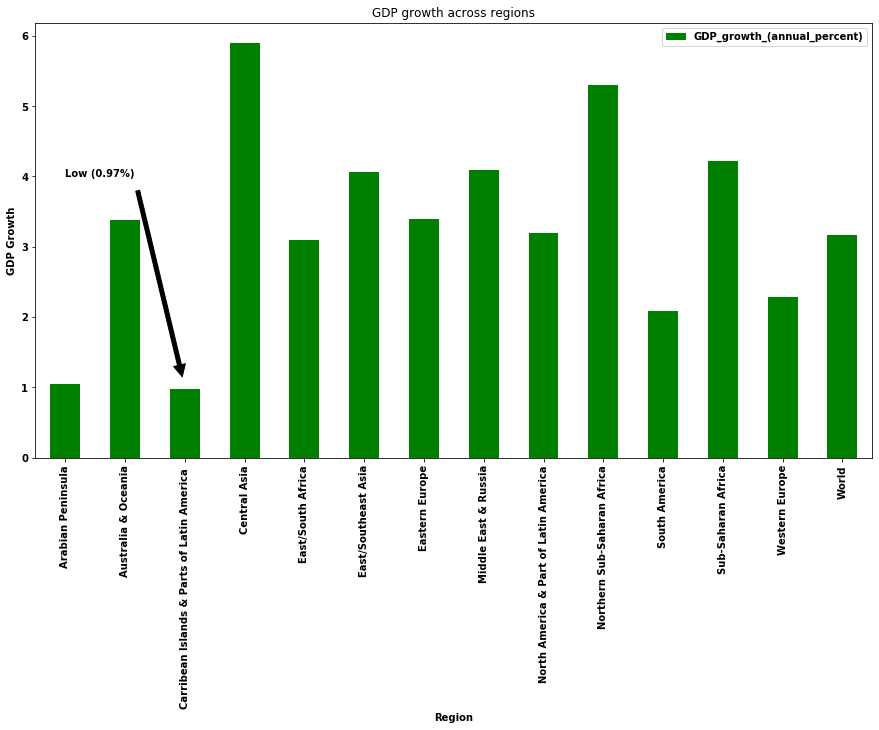

In [64]:
pd.pivot_table(all_regions, index= 'Hult_Region', values= "GDP_growth_(annual_percent)",aggfunc='mean').plot(kind= 'bar',color='green' ,figsize=(15,8))
plt.ylabel("GDP Growth")
plt.xlabel("Region")
plt.title("GDP growth across regions")
plt.annotate(
# Label and coordinate
'Low (0.97%)', xy=(2, 1), xytext=(0, 4),  
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)

plt.savefig('GDP',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

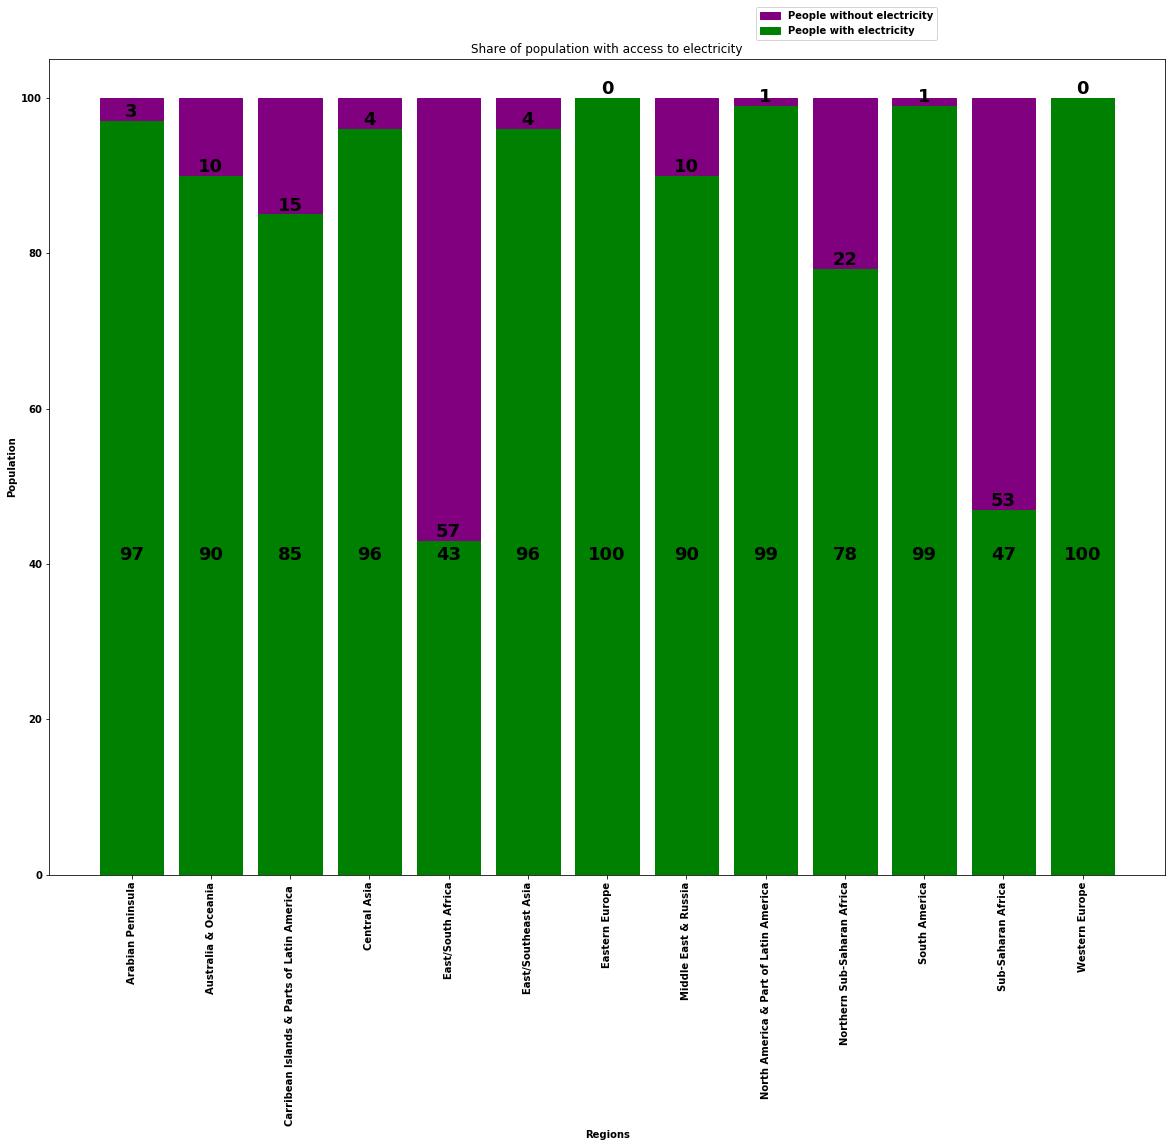

In [56]:
#Haiti
population=all_regions['Population,_total']
 
people_with_electri_country= (all_regions['Population,_total']* all_regions['Access_to_electricity_(percent_of_population)'])/100



df3=all_regions.groupby(['Hult_Region'])
#print(df3.first())
AP=df3.get_group('Arabian Peninsula') 
Aus_Oce=df3.get_group('Australia & Oceania') 
#CariLati=df3.get_group('Carribean Islands & Parts of Latin America') 
CA=df3.get_group('Central Asia') 
ESAfrica=df3.get_group('East/South Africa') 
ESAsia=df3.get_group('East/Southeast Asia') 
EE=df3.get_group('Eastern Europe') 
MERussia=df3.get_group('Middle East & Russia') 
NA_LAmerica=df3.get_group('North America & Part of Latin America') 
NSsubAfrica=df3.get_group('Northern Sub-Saharan Africa') 
AAmerica=df3.get_group('South America') 
SubSahAfrica=df3.get_group('Sub-Saharan Africa') 
WEurope=df3.get_group('Western Europe') 

Arabian_peninsula=(AP['Population,_total']* AP['Access_to_electricity_(percent_of_population)'])/100
Arabian_peninsula_sum=Arabian_peninsula.sum()
#print(Arabian_peninsula_sum)
Arabian_peninsula_percent=Arabian_peninsula_sum/AP['Population,_total'].sum()
with_Arabian_peninsula_percent=Arabian_peninsula_percent.sum()
without_Arabian_peninsula_percent=1-with_Arabian_peninsula_percent


Aus_Ocenia=(Aus_Oce['Population,_total']* Aus_Oce['Access_to_electricity_(percent_of_population)'])/100
Aus_Oce_sum=Aus_Ocenia.sum()
Aus_Oce_percent=Aus_Oce_sum/Aus_Oce['Population,_total'].sum()
with_Aus_Oce_percent=Aus_Oce_percent.sum()
without_Aus_Oce_percent=1-with_Aus_Oce_percent
#print(Aus_Oce_sum)


Carri=(region['Population,_total']* region['Access_to_electricity_(percent_of_population)'])/100
Carri_sum=Carri.sum()
#print(Arabian_peninsula_sum)
Carri_percent=Carri_sum/region['Population,_total'].sum()
with_Carri_percent=Carri_percent.sum()
without_Carri_percent=1-with_Carri_percent

CA_s=(CA['Population,_total']* CA['Access_to_electricity_(percent_of_population)'])/100
CA_sum=CA_s.sum()
CA_percent=CA_sum/CA['Population,_total'].sum()
with_CA_percent=CA_percent.sum()
without_CA_percent=1-with_CA_percent

ESAfrica_s=(ESAfrica['Population,_total']* ESAfrica['Access_to_electricity_(percent_of_population)'])/100
ESAfrica_sum=ESAfrica_s.sum()
ESAfrica_percent=ESAfrica_sum/ESAfrica['Population,_total'].sum()
with_ESAfrica_percent=ESAfrica_percent.sum()
without_ESAfrica_percent=1-with_ESAfrica_percent

ESAsia_s=(ESAsia['Population,_total']* ESAsia['Access_to_electricity_(percent_of_population)'])/100
ESAsia_sum=ESAsia_s.sum()
ESAsia_percent=ESAsia_sum/ESAsia['Population,_total'].sum()
with_ESAsia_percent=ESAsia_percent.sum()
without_ESAsia_percent=1-with_ESAsia_percent

EE_s=(EE['Population,_total']* EE['Access_to_electricity_(percent_of_population)'])/100
EE_sum=EE_s.sum()
EE_percent=EE_sum/EE['Population,_total'].sum()
with_EE_percent=EE_percent.sum()
without_EE_percent=1-with_EE_percent

MERussia_s=(MERussia['Population,_total']* MERussia['Access_to_electricity_(percent_of_population)'])/100
MERussia_sum=MERussia_s.sum()
MERussia_percent=MERussia_sum/MERussia['Population,_total'].sum()
with_MERussia_percent=MERussia_percent.sum()
without_MERussia_percent=1-with_MERussia_percent


NA_LAmerica_s=(NA_LAmerica['Population,_total']* NA_LAmerica['Access_to_electricity_(percent_of_population)'])/100
NA_LAmerica_sum=NA_LAmerica_s.sum()
NA_LAmerica_percent=NA_LAmerica_sum/NA_LAmerica['Population,_total'].sum()
with_NA_LAmerica_percent=NA_LAmerica_percent.sum()
without_NA_LAmerica_percent=1-with_NA_LAmerica_percent

NSsubAfrica_s=(NSsubAfrica['Population,_total']* NSsubAfrica['Access_to_electricity_(percent_of_population)'])/100
NSsubAfrica_sum=NSsubAfrica_s.sum()
NSsubAfrica_percent=NSsubAfrica_sum/NSsubAfrica['Population,_total'].sum()
with_NSsubAfrica_percent=NSsubAfrica_percent.sum()
without_NSsubAfrica_percent=1-with_NSsubAfrica_percent

AAmerica_s=(AAmerica['Population,_total']* AAmerica['Access_to_electricity_(percent_of_population)'])/100
AAmerica_sum=AAmerica_s.sum()
#print(AAmerica_sum)
AAmerica_percent=AAmerica_sum/AAmerica['Population,_total'].sum()
#print(AAmerica_percent)

with_AAmerica_percent=AAmerica_percent.sum()
#print(with_AAmerica_percent)
without_AAmerica_percent=1-with_AAmerica_percent


SubSahAfrica_s=(SubSahAfrica['Population,_total']* SubSahAfrica['Access_to_electricity_(percent_of_population)'])/100
SubSahAfrica_sum=SubSahAfrica_s.sum()

SubSahAfrica_percent=SubSahAfrica_sum/SubSahAfrica['Population,_total'].sum()

with_SubSahAfrica_percent=SubSahAfrica_percent.sum()
without_SubSahAfrica_percent=1-with_SubSahAfrica_percent

WEurope_s=(WEurope['Population,_total']* WEurope['Access_to_electricity_(percent_of_population)'])/100
WEurope_sum=WEurope_s.sum()
WEurope_percent=WEurope_sum/WEurope['Population,_total'].sum()
with_WEurope_percent=WEurope_percent.sum()
without_WEurope_percent=1-with_WEurope_percent
#print(round(with_Arabian_peninsula_percent,2))


array_with_elect=[with_Arabian_peninsula_percent,with_Aus_Oce_percent,with_Carri_percent,with_CA_percent,with_ESAfrica_percent,with_ESAsia_percent,with_EE_percent,with_MERussia_percent,with_NA_LAmerica_percent,
                  with_NSsubAfrica_percent,with_AAmerica_percent,with_SubSahAfrica_percent,with_WEurope_percent]
my_formatted_list = [ '%.2f' % elem for elem in array_with_elect ]
test_list = [float(i)*100 for i in my_formatted_list] 
array_without_elect=np.array([without_Arabian_peninsula_percent,without_Aus_Oce_percent,without_Carri_percent,without_CA_percent,without_ESAfrica_percent,without_ESAsia_percent,
                          without_EE_percent,without_MERussia_percent,without_NA_LAmerica_percent,without_NSsubAfrica_percent,without_AAmerica_percent,
                          without_SubSahAfrica_percent,without_WEurope_percent])
my_formatted_list1 = [ '%.2f' % elem for elem in array_without_elect ]
test_list1 = [float(i)*100 for i in my_formatted_list1]

myarray1 = np.asarray(test_list)
myarray2 = np.asarray(test_list1)
df3=pd.unique(all_regions['Hult_Region'])
df3=sorted(df3)
df3 = df3[0:13]


plt.figure(figsize=(20, 15))
bar1=plt.bar(df3, np.add(myarray2, myarray1), color='purple', edgecolor='purple',label='People without electricity')
plt.legend(bbox_to_anchor=(0.8,1.07))
bar2=plt.bar(df3, myarray1, color='green', edgecolor='green',label='People with electricity')
plt.legend(bbox_to_anchor=(0.8,1.07))
plt.xlabel('Regions')
plt.ylabel('Population')
plt.title('Share of population with access to electricity')
plt.xticks(rotation=90)
for r1, r2 in zip(bar1, bar2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2.0, h2, int(h1-h2), ha="center", va="bottom",fontsize=18)
    plt.text(r2.get_x() + r2.get_width() / 2.0, h1/2.5, int(h2), ha="center", va="bottom",fontsize=18)

#plt.tight_layout()
plt.savefig('Accessregions',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()


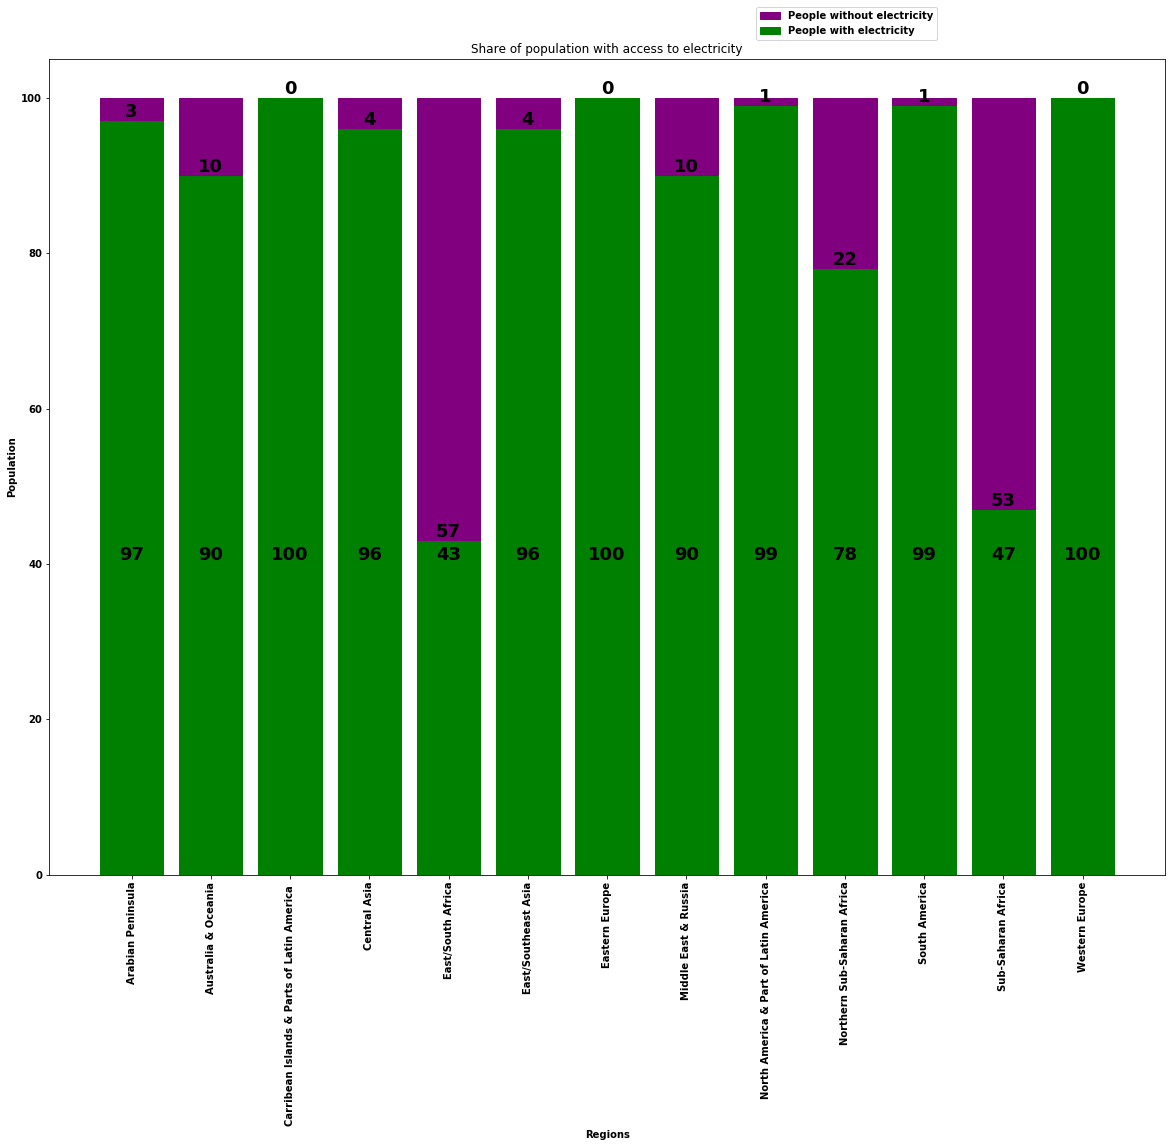

In [57]:
#Without Haiti
population=all_regions['Population,_total']
 
people_with_electri_country= (all_regions['Population,_total']* all_regions['Access_to_electricity_(percent_of_population)'])/100



df3=all_regions.groupby(['Hult_Region'])
#print(df3.first())
AP=df3.get_group('Arabian Peninsula') 
Aus_Oce=df3.get_group('Australia & Oceania') 
#CariLati=df3.get_group('Carribean Islands & Parts of Latin America') 
CA=df3.get_group('Central Asia') 
ESAfrica=df3.get_group('East/South Africa') 
ESAsia=df3.get_group('East/Southeast Asia') 
EE=df3.get_group('Eastern Europe') 
MERussia=df3.get_group('Middle East & Russia') 
NA_LAmerica=df3.get_group('North America & Part of Latin America') 
NSsubAfrica=df3.get_group('Northern Sub-Saharan Africa') 
AAmerica=df3.get_group('South America') 
SubSahAfrica=df3.get_group('Sub-Saharan Africa') 
WEurope=df3.get_group('Western Europe') 

Arabian_peninsula=(AP['Population,_total']* AP['Access_to_electricity_(percent_of_population)'])/100
Arabian_peninsula_sum=Arabian_peninsula.sum()
#print(Arabian_peninsula_sum)
Arabian_peninsula_percent=Arabian_peninsula_sum/AP['Population,_total'].sum()
with_Arabian_peninsula_percent=Arabian_peninsula_percent.sum()
without_Arabian_peninsula_percent=1-with_Arabian_peninsula_percent


Aus_Ocenia=(Aus_Oce['Population,_total']* Aus_Oce['Access_to_electricity_(percent_of_population)'])/100
Aus_Oce_sum=Aus_Ocenia.sum()
Aus_Oce_percent=Aus_Oce_sum/Aus_Oce['Population,_total'].sum()
with_Aus_Oce_percent=Aus_Oce_percent.sum()
without_Aus_Oce_percent=1-with_Aus_Oce_percent
#print(Aus_Oce_sum)

region.loc[10,'Access_to_electricity_(percent_of_population)'] =0 #for haiti
region.loc[10,'Population,_total']=0
Carri=(region['Population,_total']* region['Access_to_electricity_(percent_of_population)'])/100
Carri_sum=Carri.sum()
#print(Arabian_peninsula_sum)
Carri_percent=Carri_sum/region['Population,_total'].sum()
with_Carri_percent=Carri_percent.sum()
without_Carri_percent=1-with_Carri_percent

CA_s=(CA['Population,_total']* CA['Access_to_electricity_(percent_of_population)'])/100
CA_sum=CA_s.sum()
CA_percent=CA_sum/CA['Population,_total'].sum()
with_CA_percent=CA_percent.sum()
without_CA_percent=1-with_CA_percent

ESAfrica_s=(ESAfrica['Population,_total']* ESAfrica['Access_to_electricity_(percent_of_population)'])/100
ESAfrica_sum=ESAfrica_s.sum()
ESAfrica_percent=ESAfrica_sum/ESAfrica['Population,_total'].sum()
with_ESAfrica_percent=ESAfrica_percent.sum()
without_ESAfrica_percent=1-with_ESAfrica_percent

ESAsia_s=(ESAsia['Population,_total']* ESAsia['Access_to_electricity_(percent_of_population)'])/100
ESAsia_sum=ESAsia_s.sum()
ESAsia_percent=ESAsia_sum/ESAsia['Population,_total'].sum()
with_ESAsia_percent=ESAsia_percent.sum()
without_ESAsia_percent=1-with_ESAsia_percent

EE_s=(EE['Population,_total']* EE['Access_to_electricity_(percent_of_population)'])/100
EE_sum=EE_s.sum()
EE_percent=EE_sum/EE['Population,_total'].sum()
with_EE_percent=EE_percent.sum()
without_EE_percent=1-with_EE_percent

MERussia_s=(MERussia['Population,_total']* MERussia['Access_to_electricity_(percent_of_population)'])/100
MERussia_sum=MERussia_s.sum()
MERussia_percent=MERussia_sum/MERussia['Population,_total'].sum()
with_MERussia_percent=MERussia_percent.sum()
without_MERussia_percent=1-with_MERussia_percent


NA_LAmerica_s=(NA_LAmerica['Population,_total']* NA_LAmerica['Access_to_electricity_(percent_of_population)'])/100
NA_LAmerica_sum=NA_LAmerica_s.sum()
NA_LAmerica_percent=NA_LAmerica_sum/NA_LAmerica['Population,_total'].sum()
with_NA_LAmerica_percent=NA_LAmerica_percent.sum()
without_NA_LAmerica_percent=1-with_NA_LAmerica_percent

NSsubAfrica_s=(NSsubAfrica['Population,_total']* NSsubAfrica['Access_to_electricity_(percent_of_population)'])/100
NSsubAfrica_sum=NSsubAfrica_s.sum()
NSsubAfrica_percent=NSsubAfrica_sum/NSsubAfrica['Population,_total'].sum()
with_NSsubAfrica_percent=NSsubAfrica_percent.sum()
without_NSsubAfrica_percent=1-with_NSsubAfrica_percent

AAmerica_s=(AAmerica['Population,_total']* AAmerica['Access_to_electricity_(percent_of_population)'])/100
AAmerica_sum=AAmerica_s.sum()
#print(AAmerica_sum)
AAmerica_percent=AAmerica_sum/AAmerica['Population,_total'].sum()
#print(AAmerica_percent)

with_AAmerica_percent=AAmerica_percent.sum()
#print(with_AAmerica_percent)
without_AAmerica_percent=1-with_AAmerica_percent


SubSahAfrica_s=(SubSahAfrica['Population,_total']* SubSahAfrica['Access_to_electricity_(percent_of_population)'])/100
SubSahAfrica_sum=SubSahAfrica_s.sum()

SubSahAfrica_percent=SubSahAfrica_sum/SubSahAfrica['Population,_total'].sum()

with_SubSahAfrica_percent=SubSahAfrica_percent.sum()
without_SubSahAfrica_percent=1-with_SubSahAfrica_percent

WEurope_s=(WEurope['Population,_total']* WEurope['Access_to_electricity_(percent_of_population)'])/100
WEurope_sum=WEurope_s.sum()
WEurope_percent=WEurope_sum/WEurope['Population,_total'].sum()
with_WEurope_percent=WEurope_percent.sum()
without_WEurope_percent=1-with_WEurope_percent
#print(round(with_Arabian_peninsula_percent,2))


array_with_elect=[with_Arabian_peninsula_percent,with_Aus_Oce_percent,with_Carri_percent,with_CA_percent,with_ESAfrica_percent,with_ESAsia_percent,with_EE_percent,with_MERussia_percent,with_NA_LAmerica_percent,
                  with_NSsubAfrica_percent,with_AAmerica_percent,with_SubSahAfrica_percent,with_WEurope_percent]
my_formatted_list = [ '%.2f' % elem for elem in array_with_elect ]
test_list = [float(i)*100 for i in my_formatted_list] 
array_without_elect=np.array([without_Arabian_peninsula_percent,without_Aus_Oce_percent,without_Carri_percent,without_CA_percent,without_ESAfrica_percent,without_ESAsia_percent,
                          without_EE_percent,without_MERussia_percent,without_NA_LAmerica_percent,without_NSsubAfrica_percent,without_AAmerica_percent,
                          without_SubSahAfrica_percent,without_WEurope_percent])
my_formatted_list1 = [ '%.2f' % elem for elem in array_without_elect ]
test_list1 = [float(i)*100 for i in my_formatted_list1]

myarray1 = np.asarray(test_list)
myarray2 = np.asarray(test_list1)
df3=pd.unique(all_regions['Hult_Region'])
df3=sorted(df3)
df3 = df3[0:13]


plt.figure(figsize=(20, 15))
bar1=plt.bar(df3, np.add(myarray2, myarray1), color='purple', edgecolor='purple',label='People without electricity')
plt.legend(bbox_to_anchor=(0.8,1.07))
bar2=plt.bar(df3, myarray1, color='green', edgecolor='green',label='People with electricity')
plt.legend(bbox_to_anchor=(0.8,1.07))
plt.xlabel('Regions')
plt.ylabel('Population')
plt.title('Share of population with access to electricity')
plt.xticks(rotation=90)
for r1, r2 in zip(bar1, bar2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2.0, h2, int(h1-h2), ha="center", va="bottom",fontsize=18)
    plt.text(r2.get_x() + r2.get_width() / 2.0, h1/2.5, int(h2), ha="center", va="bottom",fontsize=18)

plt.savefig('Accessregionswithouthaiti',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()


In [58]:
region.loc[10,'Access_to_electricity_(percent_of_population)'] =43.75256348 #haiti original

region.loc[10,'Population,_total']=10982366 

In [59]:
df = all_regions[['Hult_Region','Death_rate,_crude_(per_1,000_people)']]
pd.pivot_table(df, values='Death_rate,_crude_(per_1,000_people)', 
                    columns='Hult_Region', aggfunc='mean')

Hult_Region,Arabian Peninsula,Australia & Oceania,Carribean Islands & Parts of Latin America,Central Asia,East/South Africa,East/Southeast Asia,Eastern Europe,Middle East & Russia,North America & Part of Latin America,Northern Sub-Saharan Africa,South America,Sub-Saharan Africa,Western Europe,World
"Death_rate,_crude_(per_1,000_people)",3.9256,6.480071,7.752688,6.270154,7.945667,6.213929,10.7317,9.954929,5.974273,7.2447,6.783769,8.625565,8.466667,7.542404


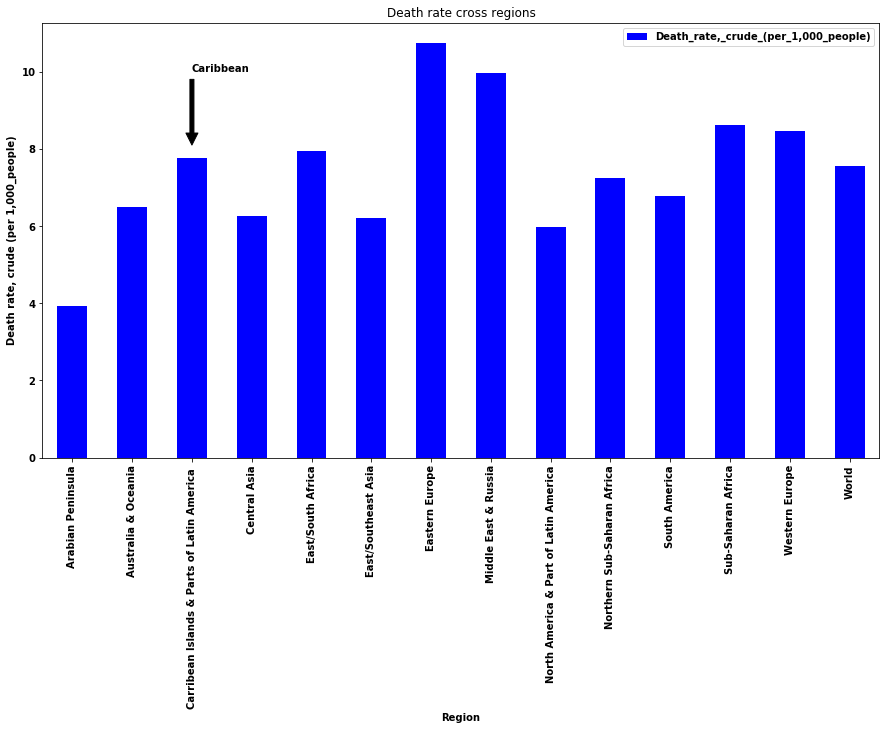

In [60]:
pd.pivot_table(all_regions, index= 'Hult_Region', values= "Death_rate,_crude_(per_1,000_people)",aggfunc='mean').plot(kind= 'bar',color='blue' ,figsize=(15,8))
plt.ylabel("Death rate, crude (per 1,000_people)")
plt.xlabel("Region")
plt.title("Death rate cross regions")
plt.annotate(
# Label and coordinate
'Caribbean', xy=(2, 8), xytext=(2, 10),  
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)

plt.savefig('DeathRegion',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

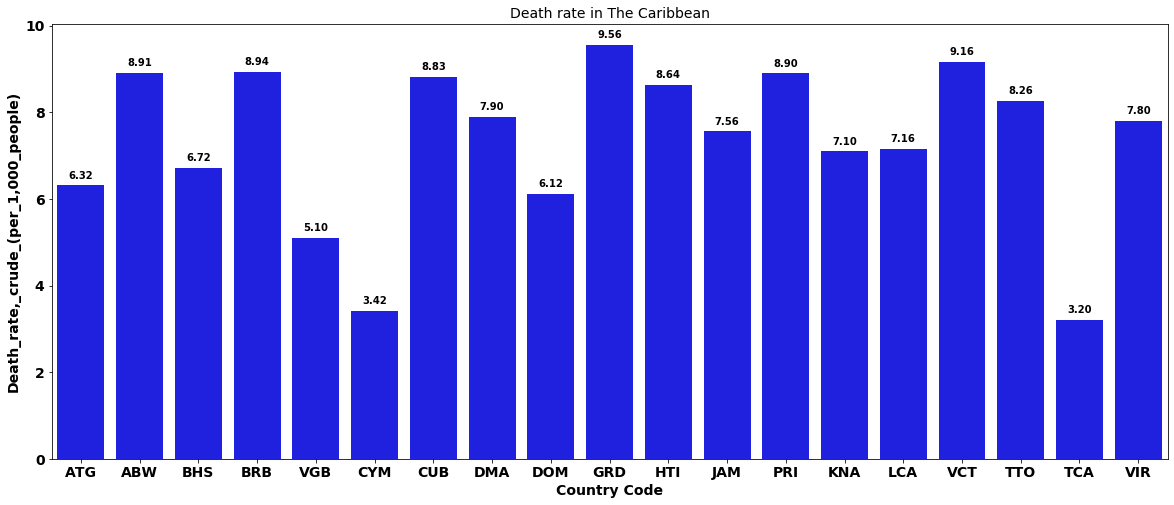

In [61]:
plt.figure(figsize=(20, 8))
clrs=['blue']
ax1=sns.barplot(x='Country_Code', y='Death_rate,_crude_(per_1,000_people)', data=region,palette=clrs)
ax1.set(xlabel='Country Code', ylabel='Death_rate,_crude_(per_1,000_people)',title="Death rate in The Caribbean")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
              ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)

plt.savefig('DGrenada',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )
plt.show()

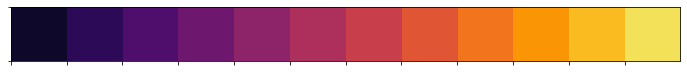

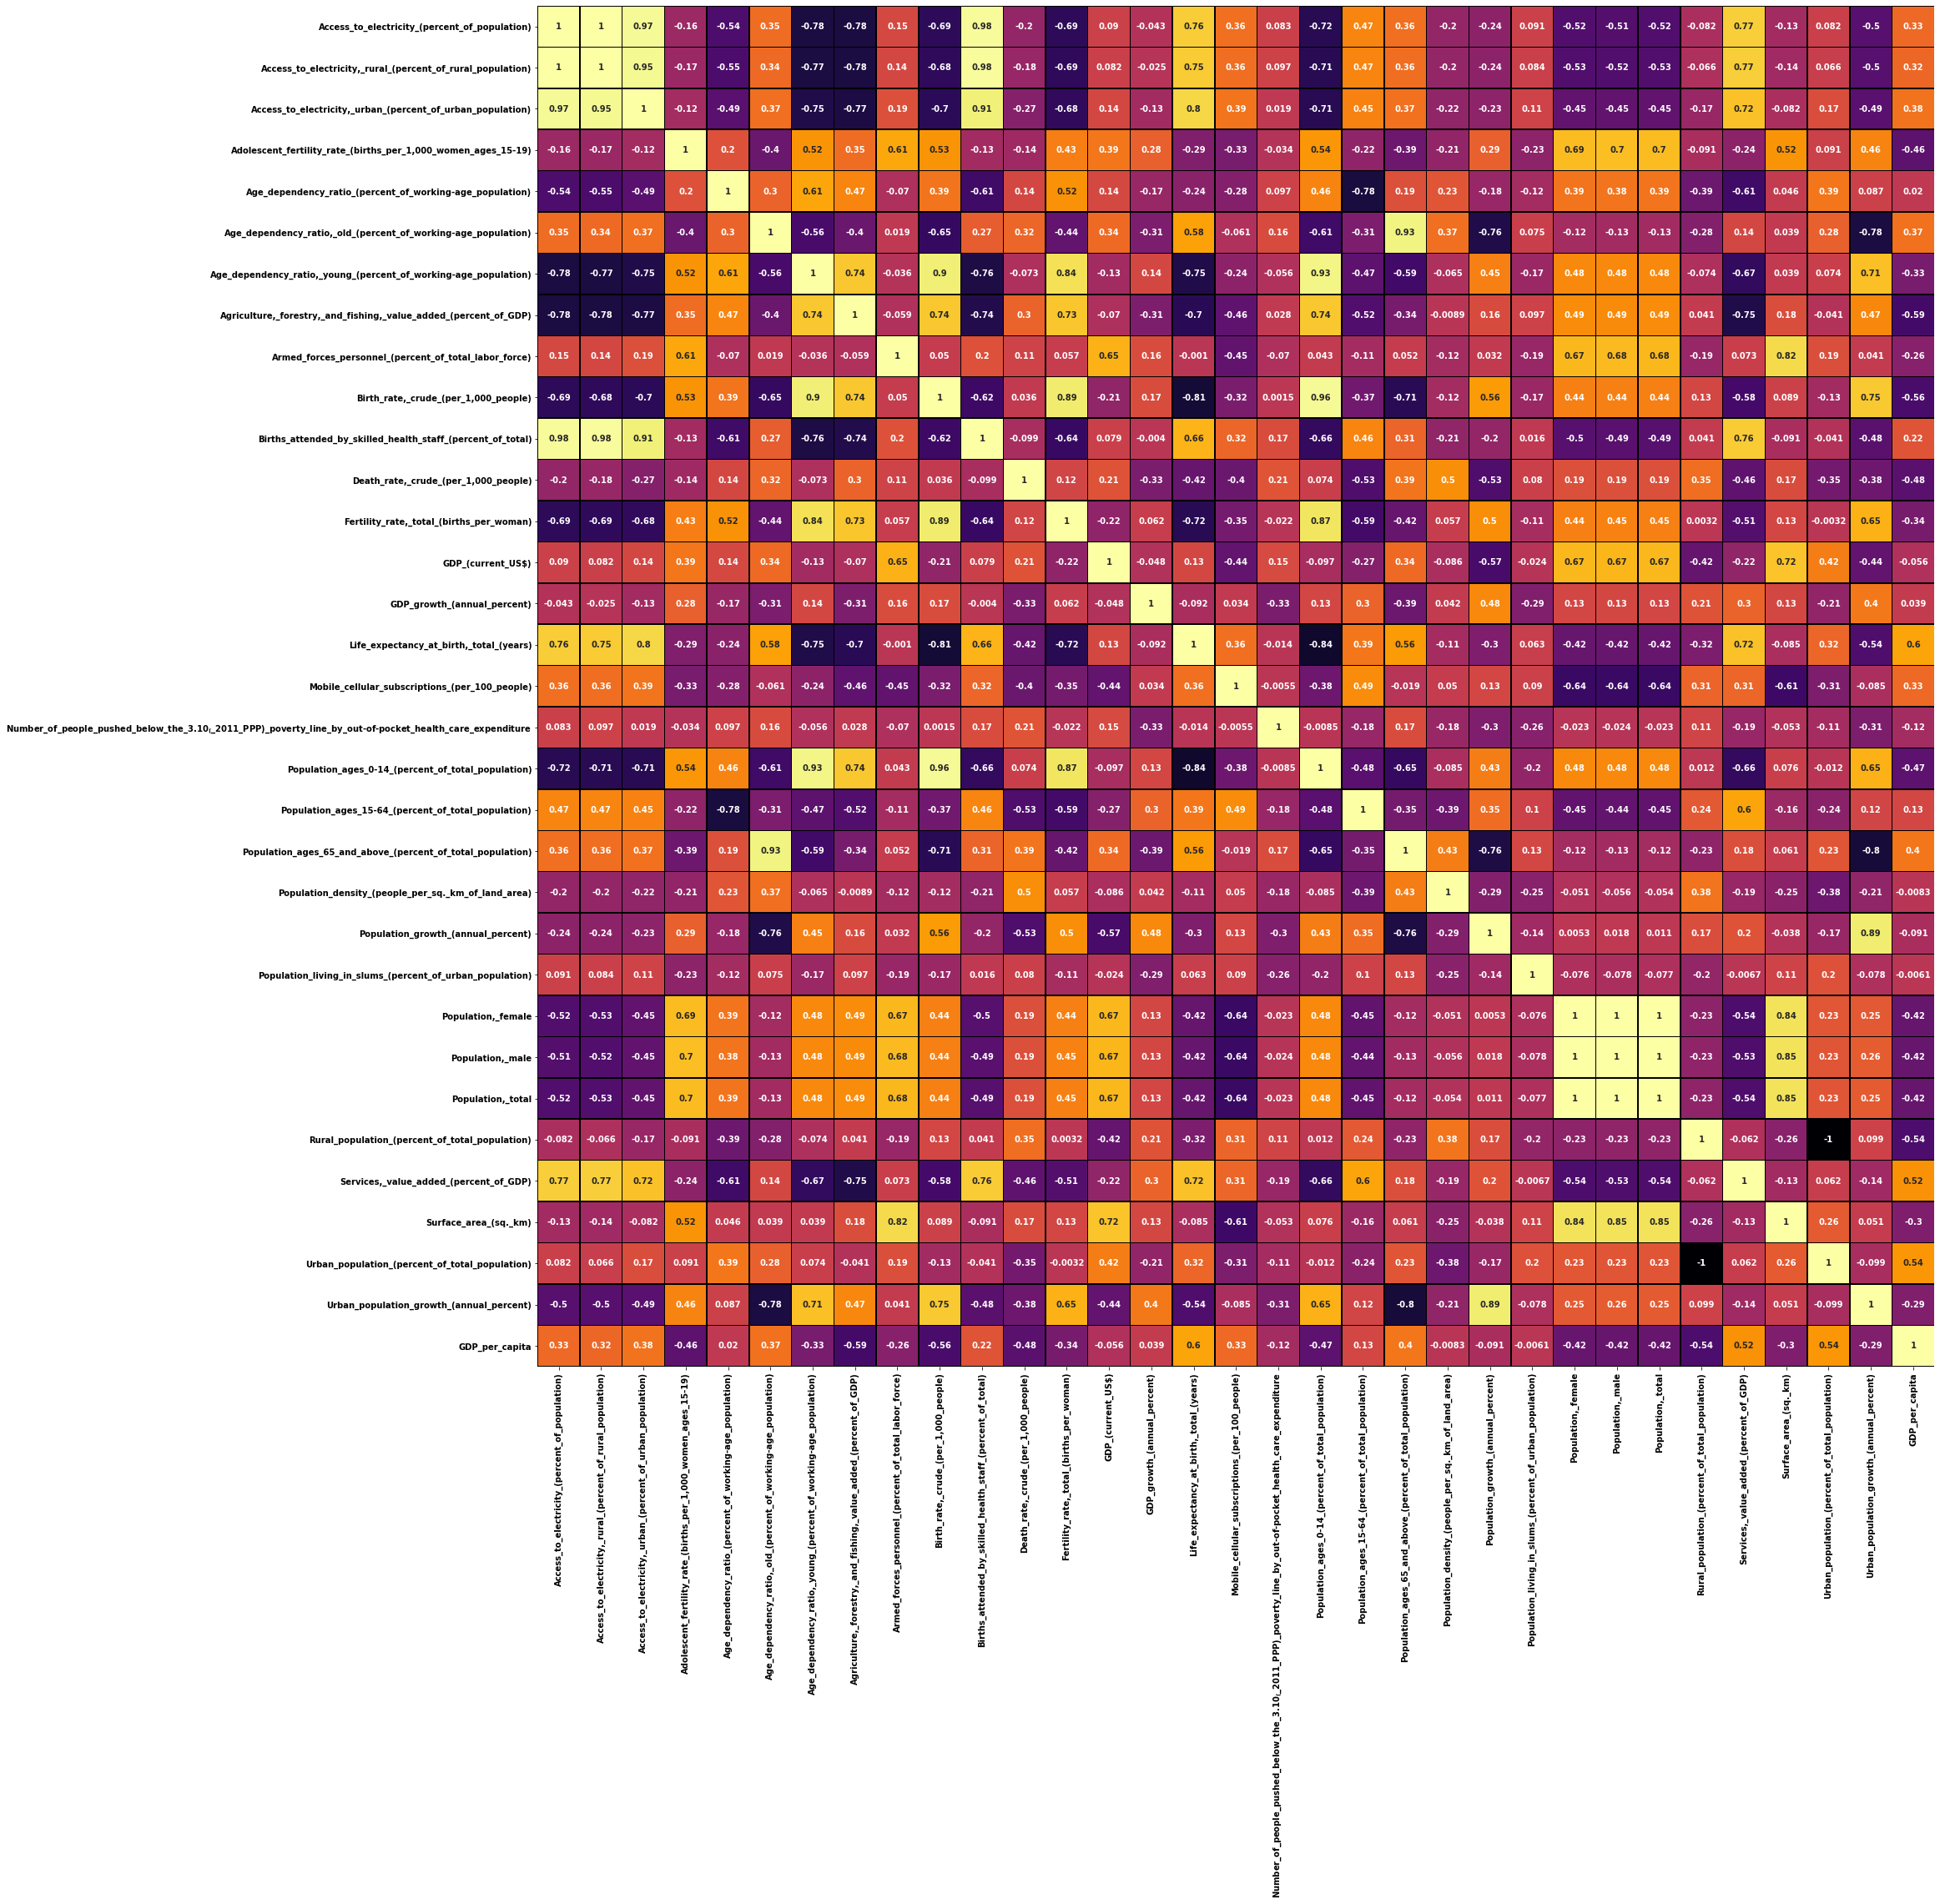

In [62]:
# Using palplot to view a color scheme
df_corr=region.corr()
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(30,30))


# creating a heatmap
sns.heatmap(df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('KPIs Correlation Heatmap 2.jpeg', 
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95)
plt.show()

In [63]:
#Service balue added

region[['Country_Name','Services,_value_added_(percent_of_GDP)']].sort_values(by = 'Services,_value_added_(percent_of_GDP)',\
                        ascending = False)

,Country_Name,"Services,_value_added_(percent_of_GDP)"
5,Cayman Islands,87.02
17,Turks & Caicos Is,75.56
14,Saint Lucia,74.98
2,"Bahamas, The",74.92
3,Barbados,73.91
6,Cuba,70.82
0,Antigua & Barbuda,68.19
1,Aruba,67.60
9,Grenada,66.94
4,British Virgin Is.,66.94
